In [1]:
import alpaca_trade_api as alpaca
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import classification_report
from pandas.tseries.offsets import DateOffset
from datetime import datetime
from sklearn import svm
from sklearn.metrics import classification_report

# Replace YOUR_API_KEY and YOUR_API_SECRET with your Alpaca API key and secret
alpaca_api = alpaca.REST('PKU5LEIDZZV83Y5ENASI', 'nvzOwJpyvr73GTitTDyga0MkI2Qd6RsK4PmhItbu', api_version='v2')


In [2]:
# Set the ticker symbol and time frame
ticker = ['CVX', 'COP', 'EOG', 'PXD', 'SLB', 'PSX', 'MPC', 'VLO', 'HES', 'OXY', 'BKR', 'FANG', 'DVN', 'HAL','SGOV','TLT','USO']
timeframe = "1Day"

# Set the start and end dates for the data
start_date = "2015-01-01T00:00:00-00:00"
end_date = "2023-10-01T00:00:00-00:00"

data = alpaca_api.get_bars(ticker, timeframe, start_date, end_date).df
df = pd.DataFrame(data)
df = df[['close', 'high', 'low', 'trade_count', 'open', 'volume', 'vwap', 'symbol']]




dfYvar = alpaca_api.get_bars('XOM',  timeframe, start_date, end_date).df[['close']]
dfYvar = dfYvar.rename(columns={'close': 'XOMclose'})

# Prepare the dataframes for analysis
dctStockDfs = {}
'''for symbol in ticker:
    temp_df = alpaca_api.get_bars(symbol, timeframe, start_date, end_date).df[['close']]
    temp_df = temp_df.rename(columns={'close': f'{symbol}close'})
    #dfYvar = pd.concat([dfYvar, temp_df], axis=1)'''


"for symbol in ticker:\n    temp_df = alpaca_api.get_bars(symbol, timeframe, start_date, end_date).df[['close']]\n    temp_df = temp_df.rename(columns={'close': f'{symbol}close'})\n    #dfYvar = pd.concat([dfYvar, temp_df], axis=1)"

In [3]:
df.shape

(31648, 8)

In [4]:
df

close      high     low  trade_count    open  \
timestamp                                                                  
2017-07-05 04:00:00+00:00   37.25   40.8200   37.25        29272   40.82   
2017-07-06 04:00:00+00:00   37.01   38.0900   36.52        32584   38.09   
2017-07-07 04:00:00+00:00   37.91   38.5900   36.12        37601   38.14   
2017-07-10 04:00:00+00:00   37.23   38.1700   36.80        27078   37.63   
2017-07-11 04:00:00+00:00   37.35   37.7800   36.89        17321   37.31   
...                           ...       ...     ...          ...     ...   
2023-09-25 04:00:00+00:00  146.54  147.6480  145.00        49747  145.27   
2023-09-26 04:00:00+00:00  141.58  145.1929  140.79        66534  145.02   
2023-09-27 04:00:00+00:00  143.95  144.9200  142.15        49979  142.75   
2023-09-28 04:00:00+00:00  147.18  148.2800  143.53        54442  143.53   
2023-09-29 04:00:00+00:00  141.71  147.3000  141.09        59877  147.15   

                            volume        vwap symbol  
timestamp                                              
2017-07-05 04:00:00+00:00  6439620   38.035527    BKR  
2017-07-06 04:00:00+00:00  5441984   37.145672    BKR  
2017-07-07 04:00:00+00:00  6277978   37.153549    BKR  
2017-07-10 04:00:00+00:00  5198664   37.290240    BKR  
2017-07-11 04:00:00+00:00  3179890   37.426017    BKR  
...                            ...         ...    ...  
2023-09-25 04:00:00+00:00  3241863  146.703786    VLO  
2023-09-26 04:00:00+00:00  4936809  142.342839    VLO  
2023-09-27 04:00:00+00:00  3644111  143.705242    VLO  
2023-09-28 04:00:00+00:00  3587272  146.862475    VLO  
2023-09-29 04:00:00+00:00  4302382  142.568629    VLO  

[31648 rows x 8 columns]

In [5]:
dfYvar

XOMclose
timestamp                          
2016-01-04 05:00:00+00:00     77.46
2016-01-05 05:00:00+00:00     78.12
2016-01-06 05:00:00+00:00     77.47
2016-01-07 05:00:00+00:00     76.23
2016-01-08 05:00:00+00:00     74.69
...                             ...
2023-09-25 04:00:00+00:00    116.23
2023-09-26 04:00:00+00:00    116.41
2023-09-27 04:00:00+00:00    120.20
2023-09-28 04:00:00+00:00    119.47
2023-09-29 04:00:00+00:00    117.58

[1949 rows x 1 columns]

In [6]:
display(df)

#df['timestamp'] = pd.to_datetime(df['timestamp'])
#df.set_index('Date', inplace=True)
#data[stock] = df

# Load data into dataframes
stocks = ticker
data = pd.DataFrame()
#df['timestamp'] = pd.to_datetime(df['timestamp'])
df=df[['close','symbol']]
if 'close' in dfYvar.columns:
    dfYvar=dfYvar['close']
    dfYvar=pd.DataFrame(dfYvar)
else:
    print("close column not found in dfYvar")
    # handle this case as needed

dctStockDfs={}

for stock in stocks:
    
    
    dfString='df'+stock
    
    data = df[df['symbol']==stock]
    
    data=data[['close']]
    #data=data['close'].pct_change()
    data=data.dropna()
    data=pd.DataFrame(data)
    data=data.rename(columns={'close':stock+'close'})
    
    display(data.tail())
    display(data.shape)
    exec(f"df{stock}=data")
    dctStockDfs[f'df{stock}']=data
    
for key, value in dctStockDfs.items():

    print(f'Key: {key},Value: {value}')


close      high     low  trade_count    open  \
timestamp                                                                  
2017-07-05 04:00:00+00:00   37.25   40.8200   37.25        29272   40.82   
2017-07-06 04:00:00+00:00   37.01   38.0900   36.52        32584   38.09   
2017-07-07 04:00:00+00:00   37.91   38.5900   36.12        37601   38.14   
2017-07-10 04:00:00+00:00   37.23   38.1700   36.80        27078   37.63   
2017-07-11 04:00:00+00:00   37.35   37.7800   36.89        17321   37.31   
...                           ...       ...     ...          ...     ...   
2023-09-25 04:00:00+00:00  146.54  147.6480  145.00        49747  145.27   
2023-09-26 04:00:00+00:00  141.58  145.1929  140.79        66534  145.02   
2023-09-27 04:00:00+00:00  143.95  144.9200  142.15        49979  142.75   
2023-09-28 04:00:00+00:00  147.18  148.2800  143.53        54442  143.53   
2023-09-29 04:00:00+00:00  141.71  147.3000  141.09        59877  147.15   

                            volume        vwap symbol  
timestamp                                              
2017-07-05 04:00:00+00:00  6439620   38.035527    BKR  
2017-07-06 04:00:00+00:00  5441984   37.145672    BKR  
2017-07-07 04:00:00+00:00  6277978   37.153549    BKR  
2017-07-10 04:00:00+00:00  5198664   37.290240    BKR  
2017-07-11 04:00:00+00:00  3179890   37.426017    BKR  
...                            ...         ...    ...  
2023-09-25 04:00:00+00:00  3241863  146.703786    VLO  
2023-09-26 04:00:00+00:00  4936809  142.342839    VLO  
2023-09-27 04:00:00+00:00  3644111  143.705242    VLO  
2023-09-28 04:00:00+00:00  3587272  146.862475    VLO  
2023-09-29 04:00:00+00:00  4302382  142.568629    VLO  

[31648 rows x 8 columns]

close column not found in dfYvar


CVXclose
timestamp                          
2023-09-25 04:00:00+00:00    168.71
2023-09-26 04:00:00+00:00    167.80
2023-09-27 04:00:00+00:00    171.04
2023-09-28 04:00:00+00:00    170.59
2023-09-29 04:00:00+00:00    168.62

(1949, 1)

COPclose
timestamp                          
2023-09-25 04:00:00+00:00    121.07
2023-09-26 04:00:00+00:00    120.14
2023-09-27 04:00:00+00:00    123.09
2023-09-28 04:00:00+00:00    122.72
2023-09-29 04:00:00+00:00    119.80

(1949, 1)

EOGclose
timestamp                          
2023-09-25 04:00:00+00:00    125.65
2023-09-26 04:00:00+00:00    126.88
2023-09-27 04:00:00+00:00    129.81
2023-09-28 04:00:00+00:00    129.47
2023-09-29 04:00:00+00:00    126.76

(1949, 1)

PXDclose
timestamp                          
2023-09-25 04:00:00+00:00    225.54
2023-09-26 04:00:00+00:00    227.87
2023-09-27 04:00:00+00:00    234.09
2023-09-28 04:00:00+00:00    234.19
2023-09-29 04:00:00+00:00    229.55

(1949, 1)

SLBclose
timestamp                          
2023-09-25 04:00:00+00:00     59.84
2023-09-26 04:00:00+00:00     59.13
2023-09-27 04:00:00+00:00     60.80
2023-09-28 04:00:00+00:00     60.94
2023-09-29 04:00:00+00:00     58.30

(1949, 1)

PSXclose
timestamp                          
2023-09-25 04:00:00+00:00    120.26
2023-09-26 04:00:00+00:00    119.42
2023-09-27 04:00:00+00:00    120.80
2023-09-28 04:00:00+00:00    123.38
2023-09-29 04:00:00+00:00    120.15

(1949, 1)

MPCclose
timestamp                          
2023-09-25 04:00:00+00:00    154.20
2023-09-26 04:00:00+00:00    151.02
2023-09-27 04:00:00+00:00    152.43
2023-09-28 04:00:00+00:00    154.43
2023-09-29 04:00:00+00:00    151.34

(1949, 1)

VLOclose
timestamp                          
2023-09-25 04:00:00+00:00    146.54
2023-09-26 04:00:00+00:00    141.58
2023-09-27 04:00:00+00:00    143.95
2023-09-28 04:00:00+00:00    147.18
2023-09-29 04:00:00+00:00    141.71

(1949, 1)

HESclose
timestamp                          
2023-09-25 04:00:00+00:00    151.94
2023-09-26 04:00:00+00:00    152.04
2023-09-27 04:00:00+00:00    158.04
2023-09-28 04:00:00+00:00    156.64
2023-09-29 04:00:00+00:00    153.00

(1949, 1)

OXYclose
timestamp                          
2023-09-25 04:00:00+00:00     63.16
2023-09-26 04:00:00+00:00     63.15
2023-09-27 04:00:00+00:00     65.60
2023-09-28 04:00:00+00:00     65.88
2023-09-29 04:00:00+00:00     64.88

(1949, 1)

BKRclose
timestamp                          
2023-09-25 04:00:00+00:00     35.90
2023-09-26 04:00:00+00:00     35.71
2023-09-27 04:00:00+00:00     36.25
2023-09-28 04:00:00+00:00     36.59
2023-09-29 04:00:00+00:00     35.32

(1571, 1)

FANGclose
timestamp                           
2023-09-25 04:00:00+00:00     152.64
2023-09-26 04:00:00+00:00     153.06
2023-09-27 04:00:00+00:00     157.23
2023-09-28 04:00:00+00:00     157.14
2023-09-29 04:00:00+00:00     154.88

(1949, 1)

DVNclose
timestamp                          
2023-09-25 04:00:00+00:00     47.51
2023-09-26 04:00:00+00:00     46.95
2023-09-27 04:00:00+00:00     48.84
2023-09-28 04:00:00+00:00     48.81
2023-09-29 04:00:00+00:00     47.70

(1949, 1)

HALclose
timestamp                          
2023-09-25 04:00:00+00:00     40.98
2023-09-26 04:00:00+00:00     40.79
2023-09-27 04:00:00+00:00     42.03
2023-09-28 04:00:00+00:00     41.79
2023-09-29 04:00:00+00:00     40.50

(1949, 1)

SGOVclose
timestamp                           
2023-09-25 04:00:00+00:00     100.58
2023-09-26 04:00:00+00:00     100.58
2023-09-27 04:00:00+00:00     100.61
2023-09-28 04:00:00+00:00     100.64
2023-09-29 04:00:00+00:00     100.67

(842, 1)

TLTclose
timestamp                          
2023-09-25 04:00:00+00:00     89.18
2023-09-26 04:00:00+00:00     88.87
2023-09-27 04:00:00+00:00     88.41
2023-09-28 04:00:00+00:00     88.68
2023-09-29 04:00:00+00:00     88.69

(1949, 1)

USOclose
timestamp                          
2023-09-25 04:00:00+00:00     80.39
2023-09-26 04:00:00+00:00     80.88
2023-09-27 04:00:00+00:00     82.90
2023-09-28 04:00:00+00:00     81.57
2023-09-29 04:00:00+00:00     80.86

(1949, 1)

Key: dfCVX,Value:                            CVXclose
timestamp                          
2016-01-04 05:00:00+00:00     88.85
2016-01-05 05:00:00+00:00     89.61
2016-01-06 05:00:00+00:00     86.07
2016-01-07 05:00:00+00:00     83.02
2016-01-08 05:00:00+00:00     82.13
...                             ...
2023-09-25 04:00:00+00:00    168.71
2023-09-26 04:00:00+00:00    167.80
2023-09-27 04:00:00+00:00    171.04
2023-09-28 04:00:00+00:00    170.59
2023-09-29 04:00:00+00:00    168.62

[1949 rows x 1 columns]
Key: dfCOP,Value:                            COPclose
timestamp                          
2016-01-04 05:00:00+00:00     46.88
2016-01-05 05:00:00+00:00     47.40
2016-01-06 05:00:00+00:00     45.35
2016-01-07 05:00:00+00:00     44.06
2016-01-08 05:00:00+00:00     43.29
...                             ...
2023-09-25 04:00:00+00:00    121.07
2023-09-26 04:00:00+00:00    120.14
2023-09-27 04:00:00+00:00    123.09
2023-09-28 04:00:00+00:00    122.72
2023-09-29 04:00:00+00:00    119.80

[1

XOMclose
timestamp                          
2016-01-04 05:00:00+00:00     77.46
2016-01-05 05:00:00+00:00     78.12
2016-01-06 05:00:00+00:00     77.47
2016-01-07 05:00:00+00:00     76.23
2016-01-08 05:00:00+00:00     74.69
...                             ...
2023-09-25 04:00:00+00:00    116.23
2023-09-26 04:00:00+00:00    116.41
2023-09-27 04:00:00+00:00    120.20
2023-09-28 04:00:00+00:00    119.47
2023-09-29 04:00:00+00:00    117.58

[1949 rows x 1 columns]

Pct Change Period is 20


<Figure size 432x288 with 0 Axes>

Correlation between XOM and dfPXD: -0.10698025568673085



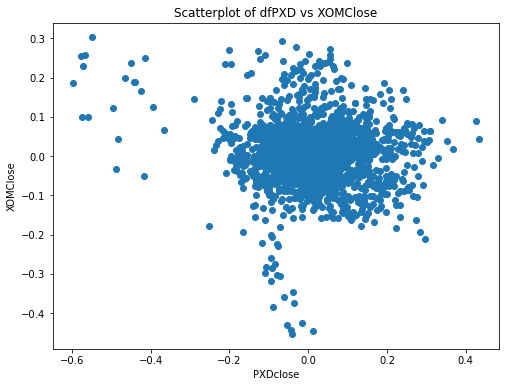

-------------------------------------------------------------
Pct Change Period is 20


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 20Day Rolling Corr of dfPXD: 0.045974791143610326



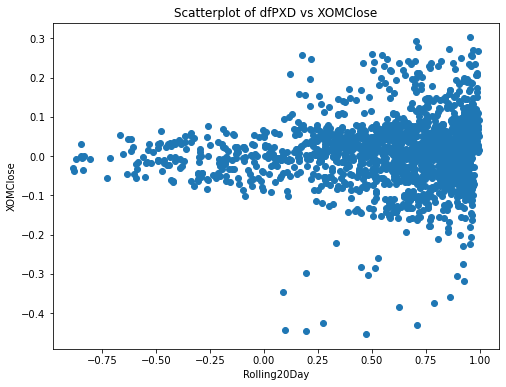

Pct Change Period is 20


<Figure size 432x288 with 0 Axes>

Correlation between XOM and dfTLT: -0.11157358506401645



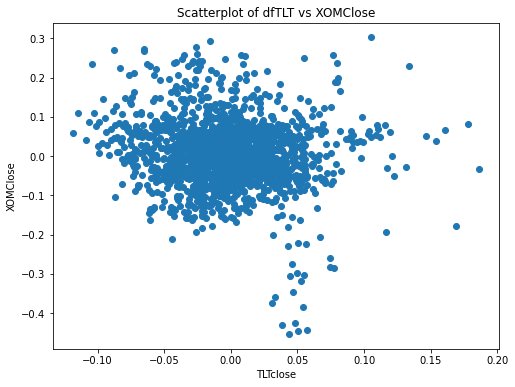

-------------------------------------------------------------
Pct Change Period is 20


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 20Day Rolling Corr of dfTLT: -0.037919485019133725



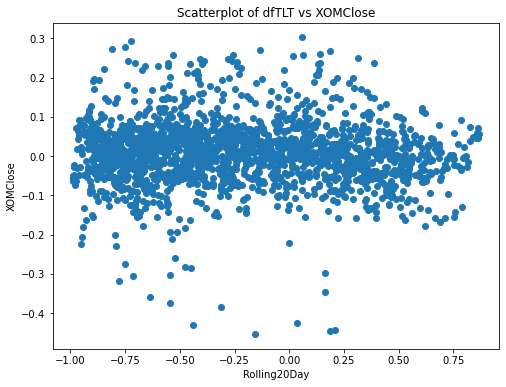

Pct Change Period is 25


<Figure size 432x288 with 0 Axes>

Correlation between XOM and dfPXD: -0.11738203534738116



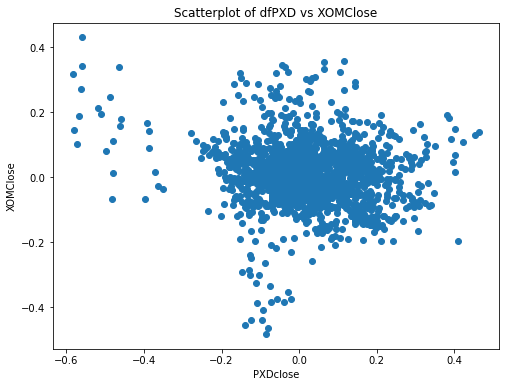

-------------------------------------------------------------
Pct Change Period is 25


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 25Day Rolling Corr of dfPXD: 0.043089335659113895



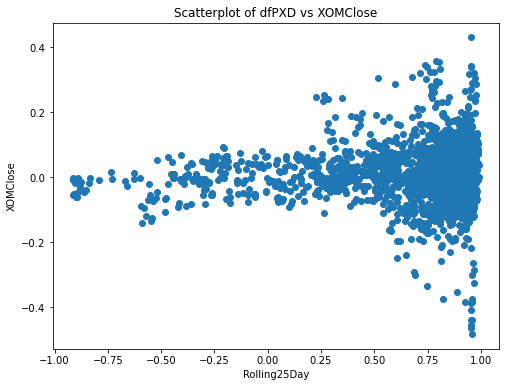

Pct Change Period is 25


<Figure size 432x288 with 0 Axes>

Correlation between XOM and dfTLT: -0.12015145416230778



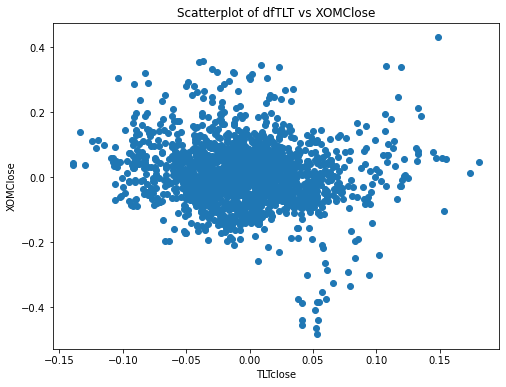

-------------------------------------------------------------
Pct Change Period is 25


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 25Day Rolling Corr of dfTLT: 0.00020312007229379882



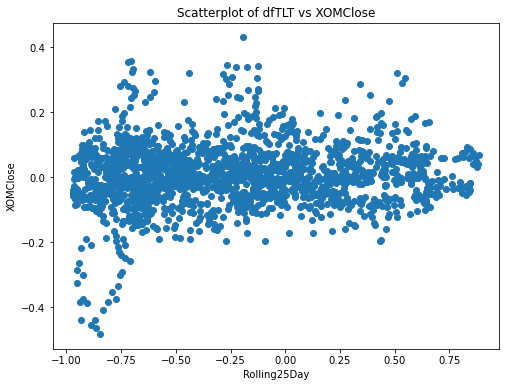

Pct Change Period is 30


<Figure size 432x288 with 0 Axes>

Correlation between XOM and dfPXD: -0.12869919527269338



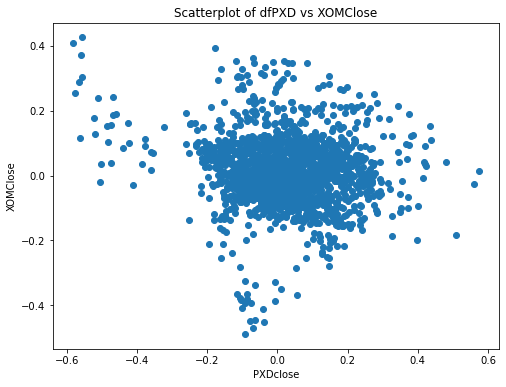

-------------------------------------------------------------
Pct Change Period is 30


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 30Day Rolling Corr of dfPXD: 0.014983769267756021



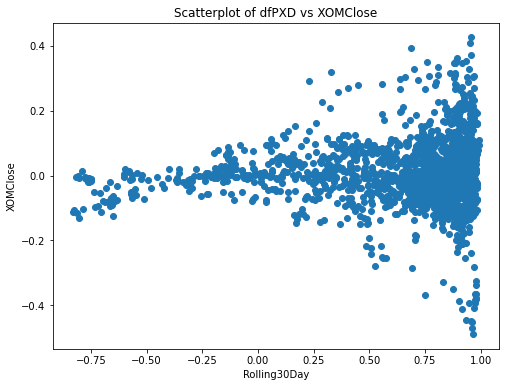

Pct Change Period is 30


<Figure size 432x288 with 0 Axes>

Correlation between XOM and dfHAL: -0.12895646021576906



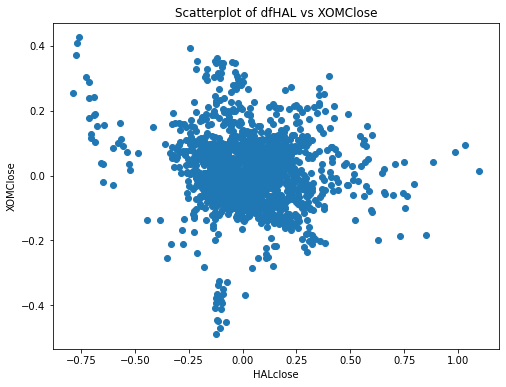

-------------------------------------------------------------
Pct Change Period is 30


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 30Day Rolling Corr of dfHAL: -0.010751293858902434



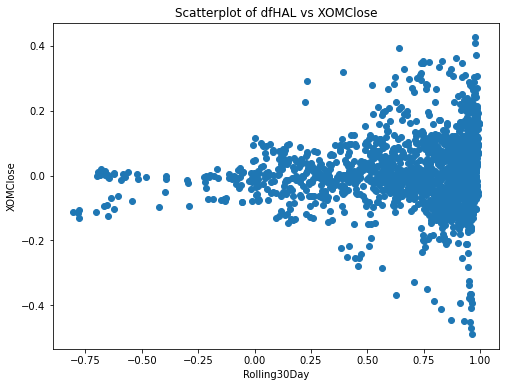

Pct Change Period is 30


<Figure size 432x288 with 0 Axes>

Correlation between XOM and dfTLT: -0.12296718498588236



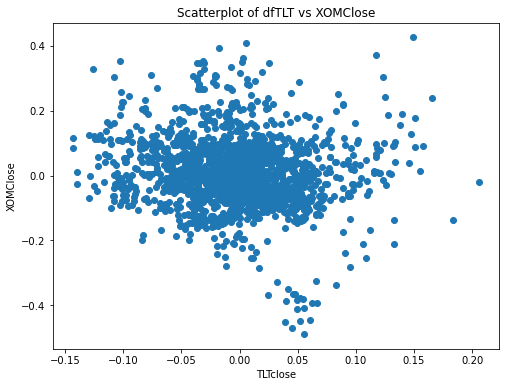

-------------------------------------------------------------
Pct Change Period is 30


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 30Day Rolling Corr of dfTLT: -0.024782942497827136



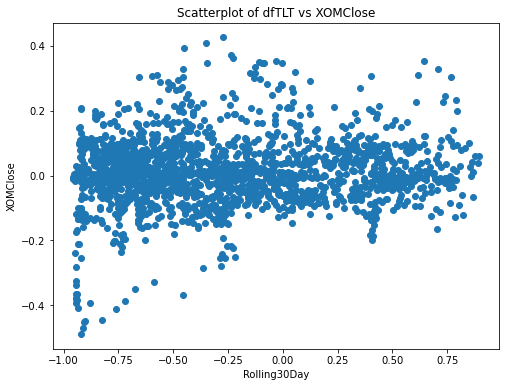

Pct Change Period is 35


<Figure size 432x288 with 0 Axes>

Correlation between XOM and dfPXD: -0.12177670514454769



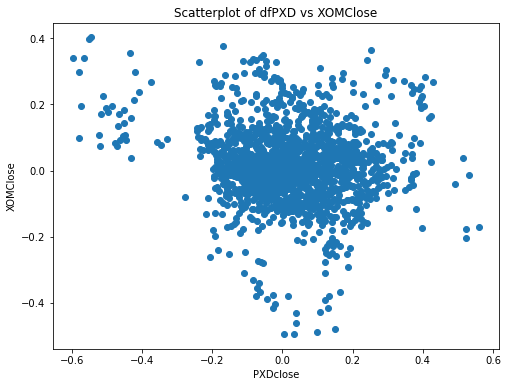

-------------------------------------------------------------
Pct Change Period is 35


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 35Day Rolling Corr of dfPXD: 0.04682227622391119



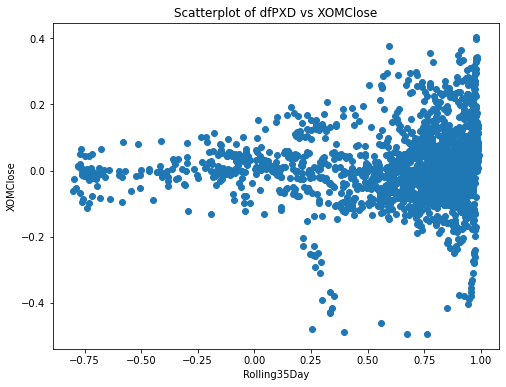

Pct Change Period is 35


<Figure size 432x288 with 0 Axes>

Correlation between XOM and dfHAL: -0.1390818918924313



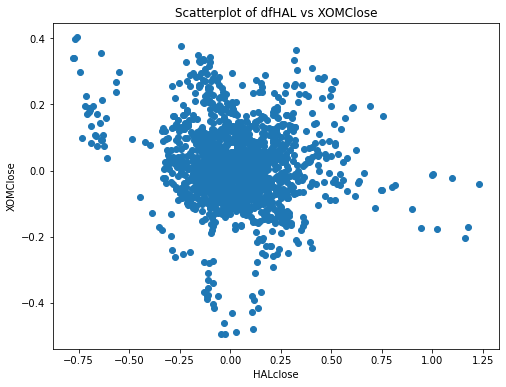

-------------------------------------------------------------
Pct Change Period is 35


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 35Day Rolling Corr of dfHAL: -0.004849197072843399



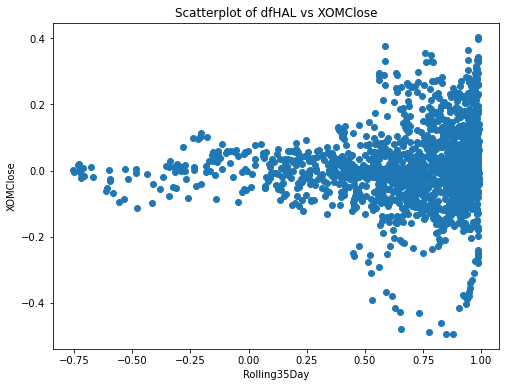

Pct Change Period is 35


<Figure size 432x288 with 0 Axes>

Correlation between XOM and dfTLT: -0.10331717511373176



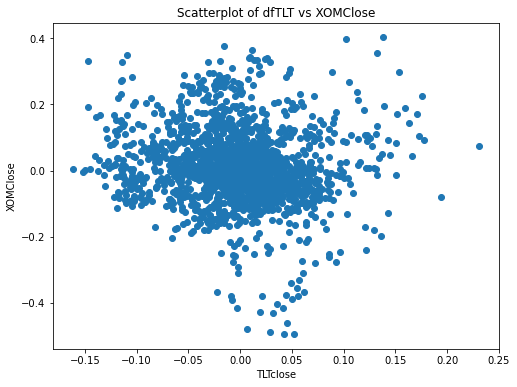

-------------------------------------------------------------
Pct Change Period is 35


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 35Day Rolling Corr of dfTLT: -0.05312828958413405



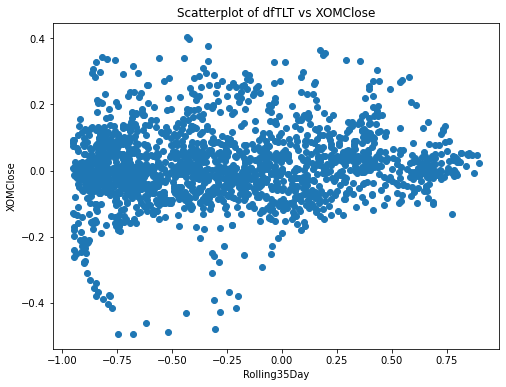

Pct Change Period is 35
Correlation between XOM and dfUSO: -0.10573913996772423



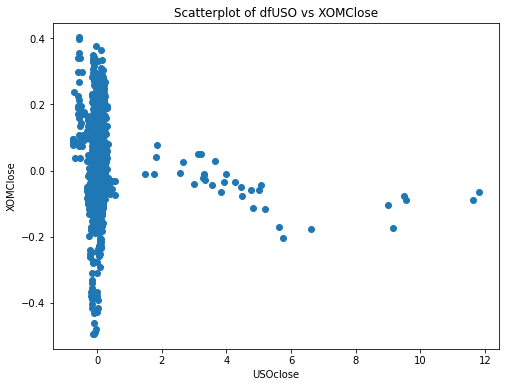

-------------------------------------------------------------
Pct Change Period is 35


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 35Day Rolling Corr of dfUSO: 0.03576375357478589



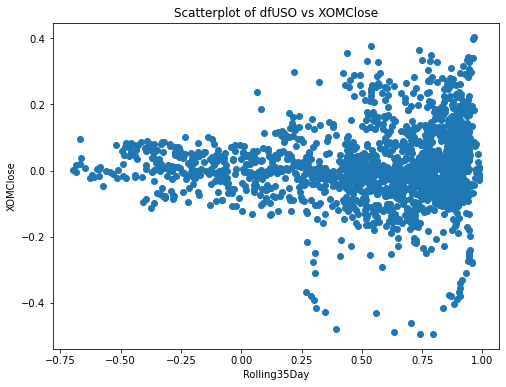

Pct Change Period is 40


<Figure size 432x288 with 0 Axes>

Correlation between XOM and dfHAL: -0.1284952519651874



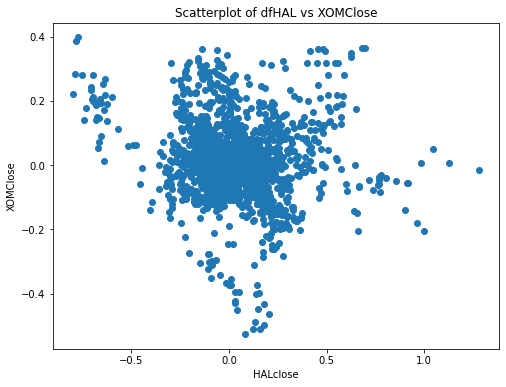

-------------------------------------------------------------
Pct Change Period is 40


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 40Day Rolling Corr of dfHAL: -0.017526611595660727



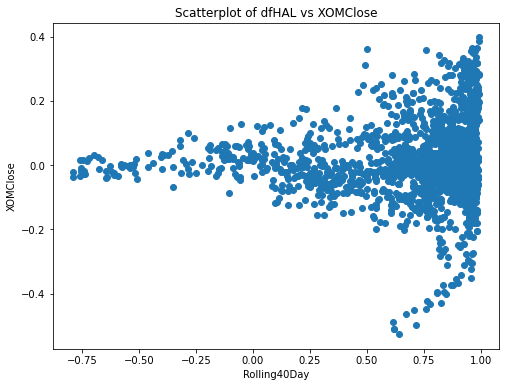

Pct Change Period is 40
Correlation between XOM and dfSGOV: -0.13625469639032245



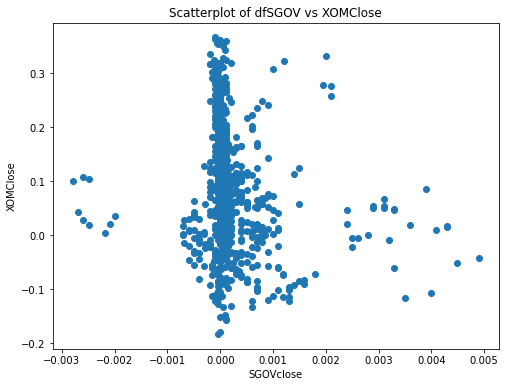

-------------------------------------------------------------
Pct Change Period is 40


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 40Day Rolling Corr of dfSGOV: -0.13926513776598773



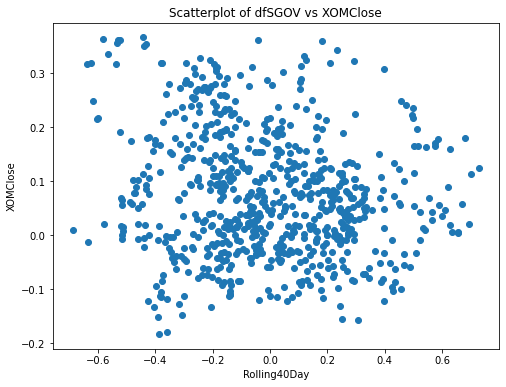

Pct Change Period is 40


<Figure size 432x288 with 0 Axes>

Correlation between XOM and dfUSO: -0.10739594096825733



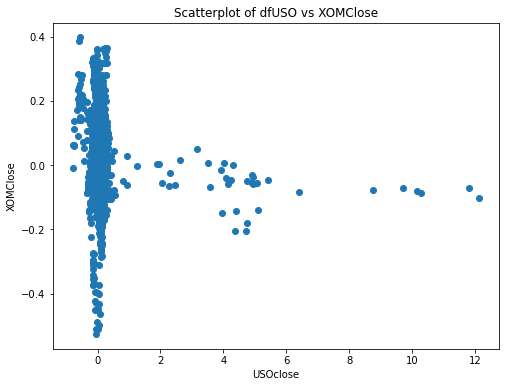

-------------------------------------------------------------
Pct Change Period is 40


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 40Day Rolling Corr of dfUSO: 0.07410761851886932



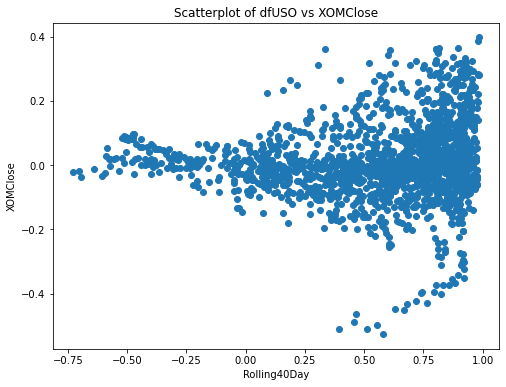

Pct Change Period is 45


<Figure size 432x288 with 0 Axes>

Correlation between XOM and dfHAL: -0.13328804456351756



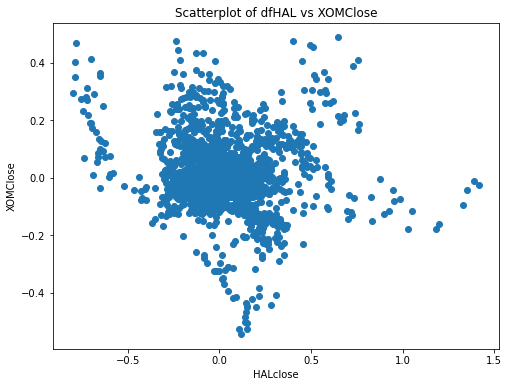

-------------------------------------------------------------
Pct Change Period is 45


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 45Day Rolling Corr of dfHAL: -0.028972398461808713



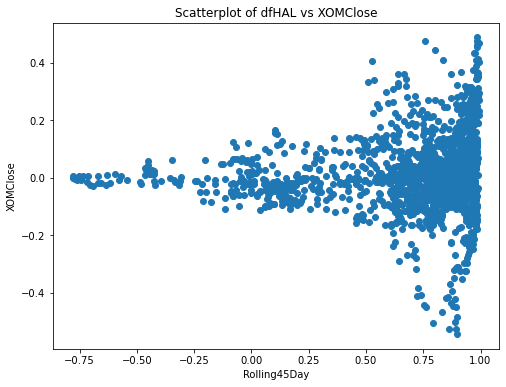

Pct Change Period is 45
Correlation between XOM and dfSGOV: -0.14883001692748812



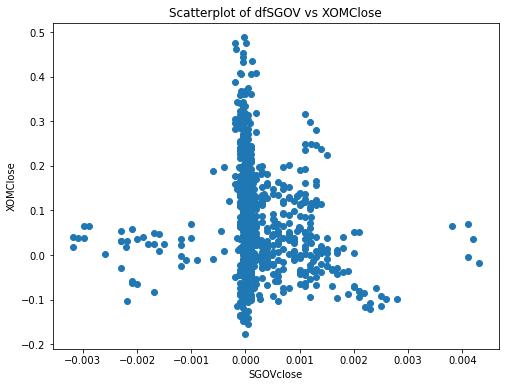

-------------------------------------------------------------
Pct Change Period is 45


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 45Day Rolling Corr of dfSGOV: -0.06339730900647686



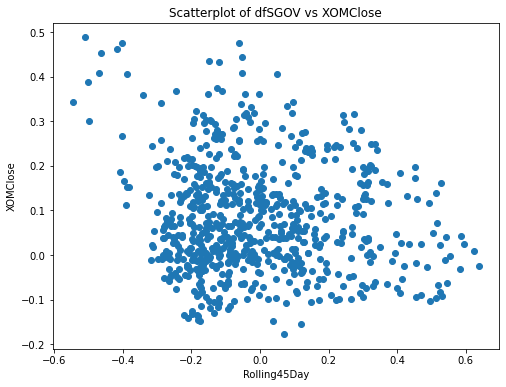

Pct Change Period is 45


<Figure size 432x288 with 0 Axes>

Correlation between XOM and dfUSO: -0.13158681295884034



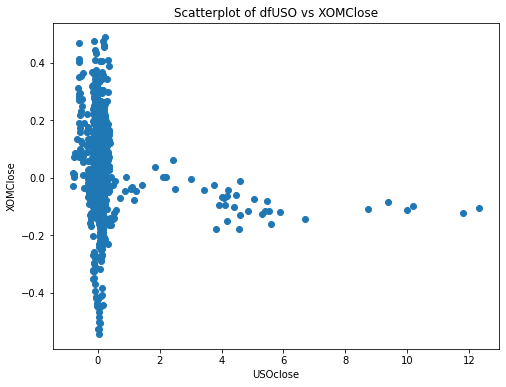

-------------------------------------------------------------
Pct Change Period is 45


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 45Day Rolling Corr of dfUSO: 0.11028825924101662



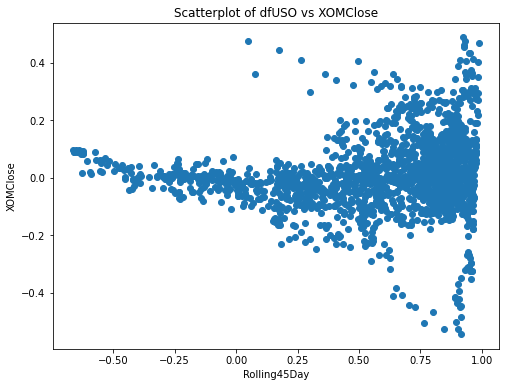

Pct Change Period is 50


<Figure size 432x288 with 0 Axes>

Correlation between XOM and dfPXD: -0.10181985111240208



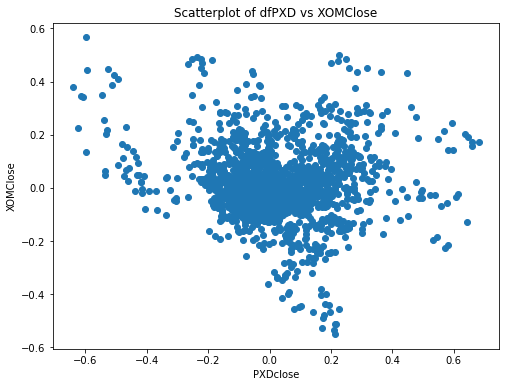

-------------------------------------------------------------
Pct Change Period is 50


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 50Day Rolling Corr of dfPXD: 0.13345742340325928



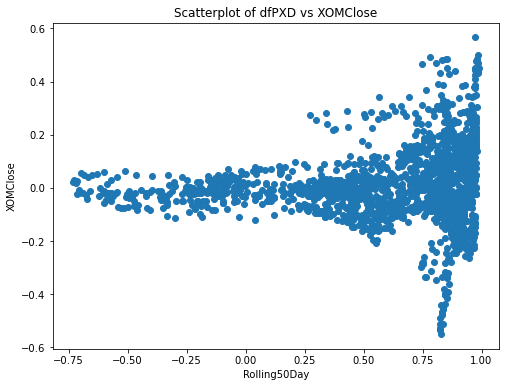

Pct Change Period is 50


<Figure size 432x288 with 0 Axes>

Correlation between XOM and dfHES: -0.11086472231259192



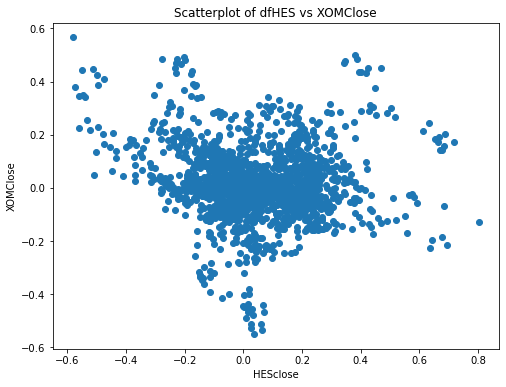

-------------------------------------------------------------
Pct Change Period is 50


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 50Day Rolling Corr of dfHES: 0.0874628653356377



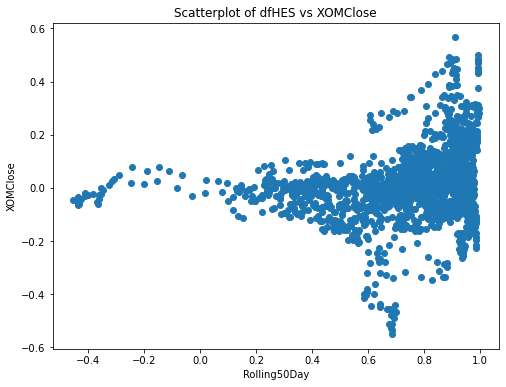

Pct Change Period is 50


<Figure size 432x288 with 0 Axes>

Correlation between XOM and dfHAL: -0.1461208458220837



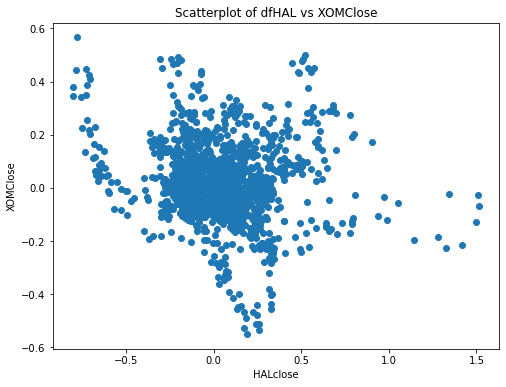

-------------------------------------------------------------
Pct Change Period is 50


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 50Day Rolling Corr of dfHAL: -0.023805374833233108



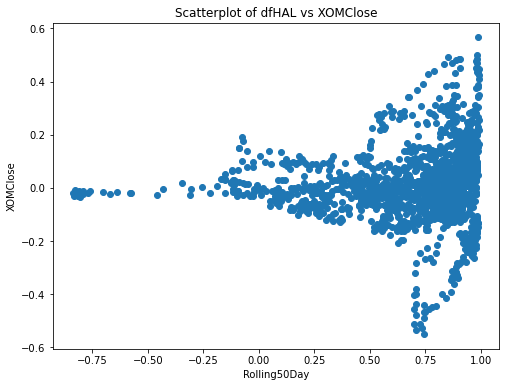

Pct Change Period is 50
Correlation between XOM and dfSGOV: -0.13109328934901304



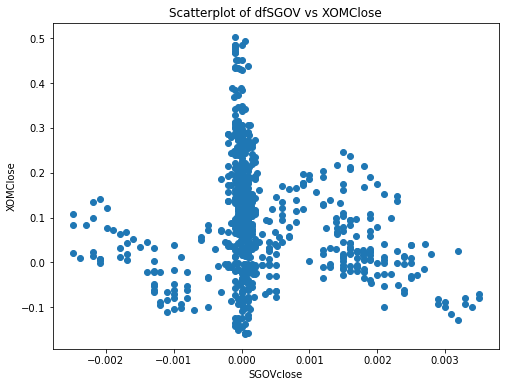

-------------------------------------------------------------
Pct Change Period is 50


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 50Day Rolling Corr of dfSGOV: 0.01840924462130085



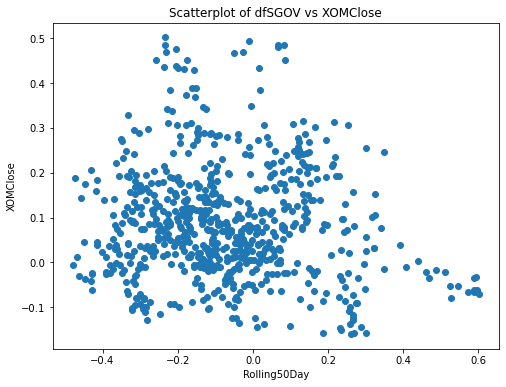

Pct Change Period is 50


<Figure size 432x288 with 0 Axes>

Correlation between XOM and dfUSO: -0.16263415951286936



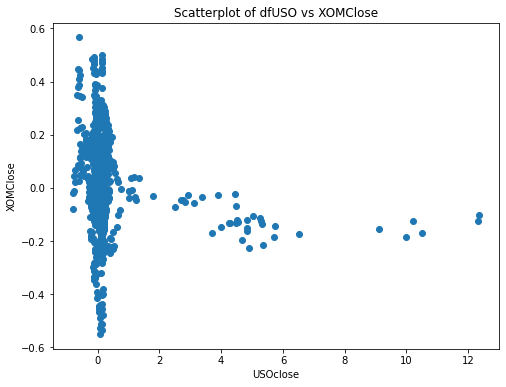

-------------------------------------------------------------
Pct Change Period is 50


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 50Day Rolling Corr of dfUSO: 0.12107974110488302



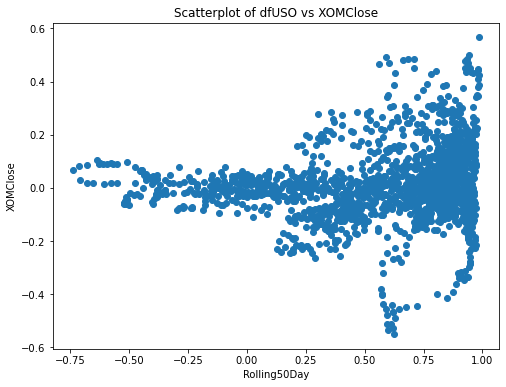

Pct Change Period is 55


<Figure size 432x288 with 0 Axes>

Correlation between XOM and dfPXD: -0.10694580667443278



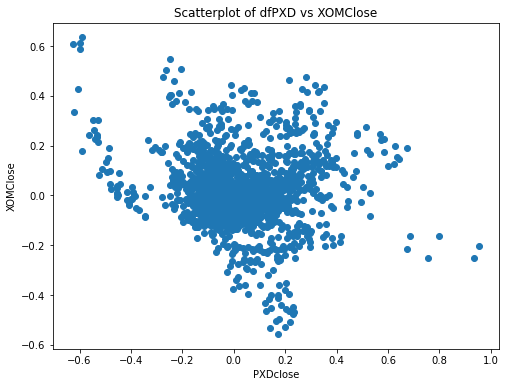

-------------------------------------------------------------
Pct Change Period is 55


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 55Day Rolling Corr of dfPXD: 0.1689704490801818



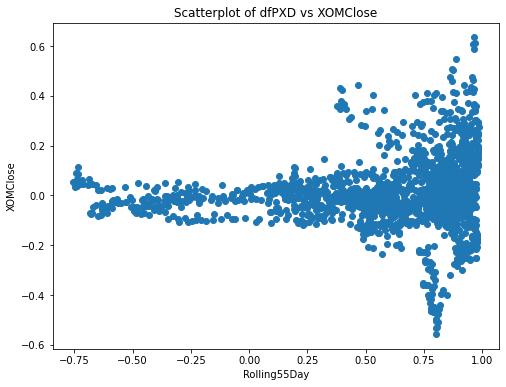

Pct Change Period is 55


<Figure size 432x288 with 0 Axes>

Correlation between XOM and dfMPC: -0.10007631304414685



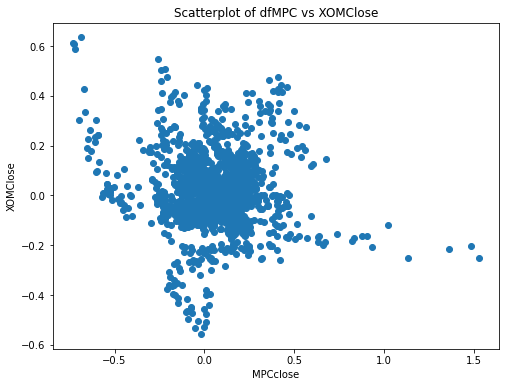

-------------------------------------------------------------
Pct Change Period is 55


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 55Day Rolling Corr of dfMPC: 0.09005640285838304



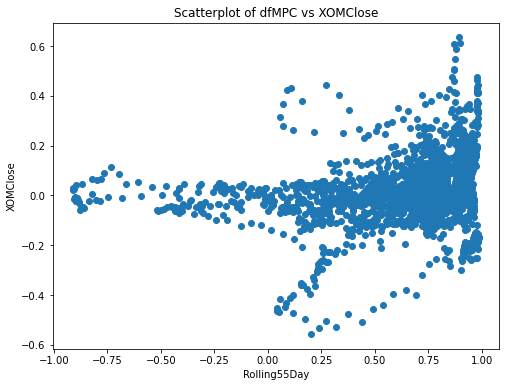

Pct Change Period is 55
Correlation between XOM and dfVLO: -0.10294702122493105



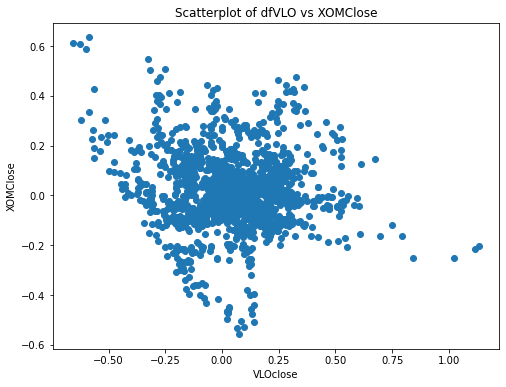

-------------------------------------------------------------
Pct Change Period is 55


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 55Day Rolling Corr of dfVLO: 0.11368077316823291



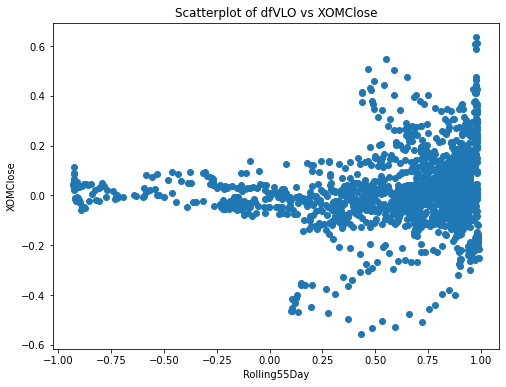

Pct Change Period is 55
Correlation between XOM and dfHES: -0.12962812565960982



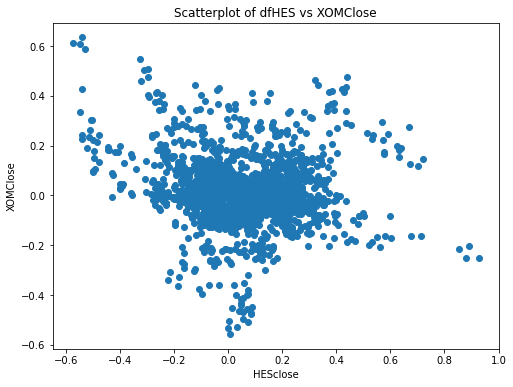

-------------------------------------------------------------
Pct Change Period is 55


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 55Day Rolling Corr of dfHES: 0.08741051237034884



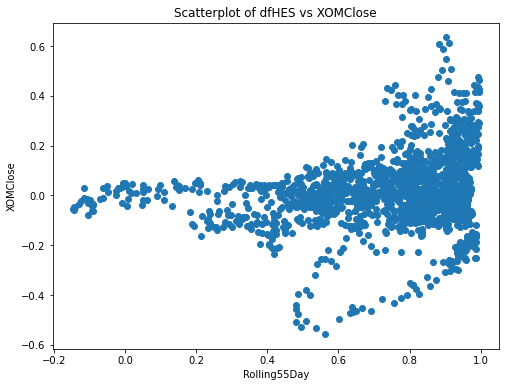

Pct Change Period is 55


<Figure size 432x288 with 0 Axes>

Correlation between XOM and dfHAL: -0.1590211952357856



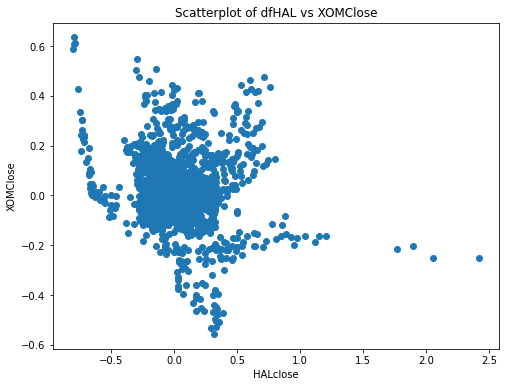

-------------------------------------------------------------
Pct Change Period is 55


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 55Day Rolling Corr of dfHAL: -0.017791893541655484



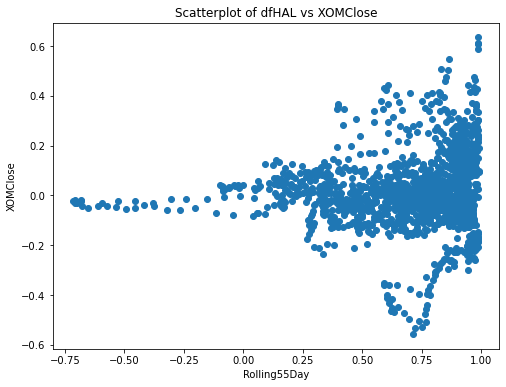

Pct Change Period is 55
Correlation between XOM and dfSGOV: -0.14833837583200626



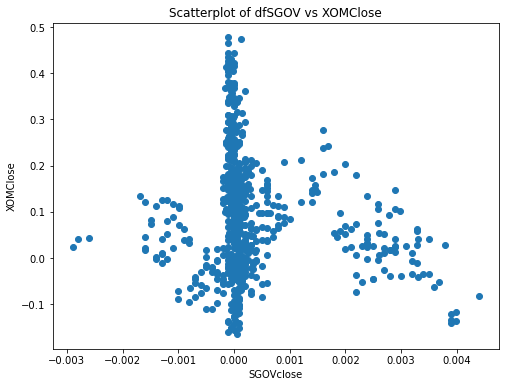

-------------------------------------------------------------
Pct Change Period is 55


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 55Day Rolling Corr of dfSGOV: 0.1673503027020163



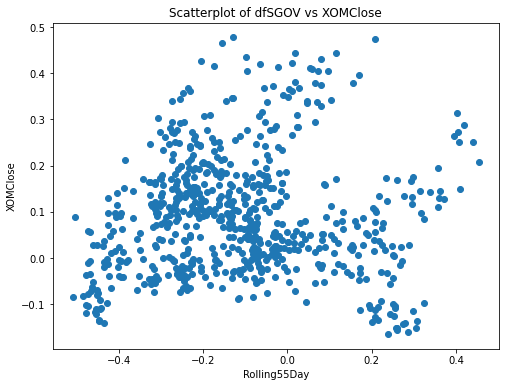

Pct Change Period is 55


<Figure size 432x288 with 0 Axes>

Correlation between XOM and dfUSO: -0.2080440251798053



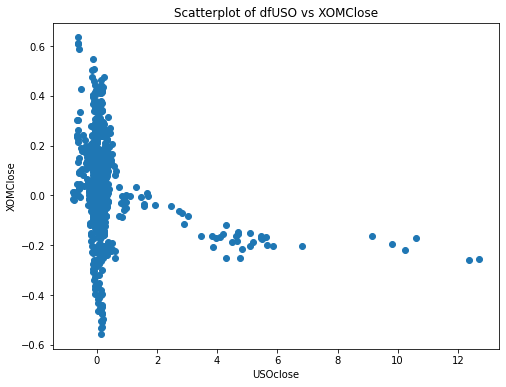

-------------------------------------------------------------
Pct Change Period is 55


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 55Day Rolling Corr of dfUSO: 0.13159725469726694



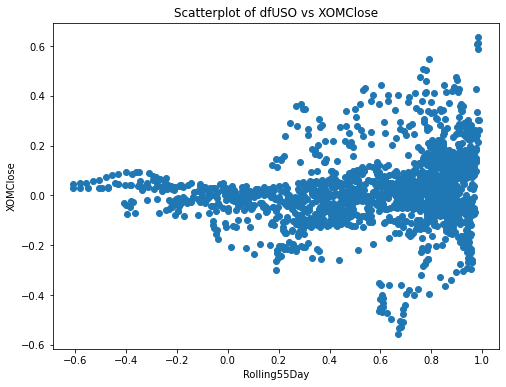

Pct Change Period is 60


<Figure size 432x288 with 0 Axes>

Correlation between XOM and dfPSX: -0.10685511022611908



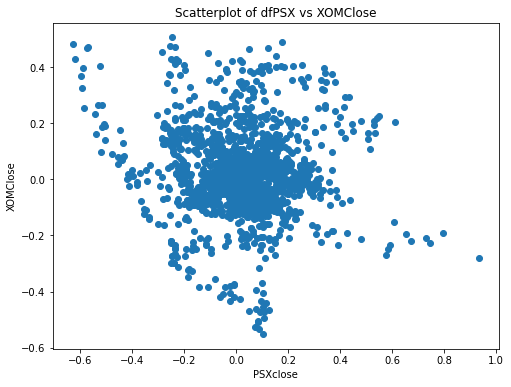

-------------------------------------------------------------
Pct Change Period is 60


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 60Day Rolling Corr of dfPSX: 0.10365791112038143



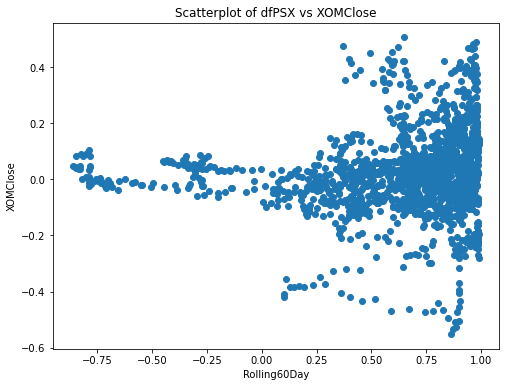

Pct Change Period is 60
Correlation between XOM and dfMPC: -0.11381483718663123



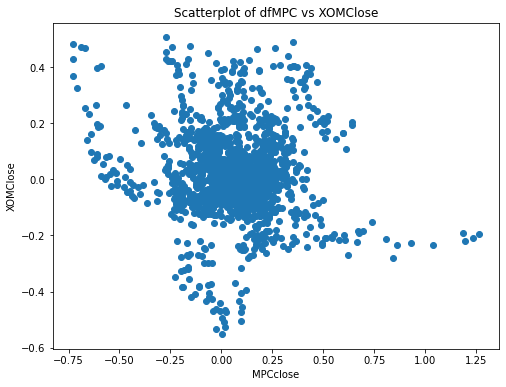

-------------------------------------------------------------
Pct Change Period is 60


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 60Day Rolling Corr of dfMPC: 0.07258985589667684



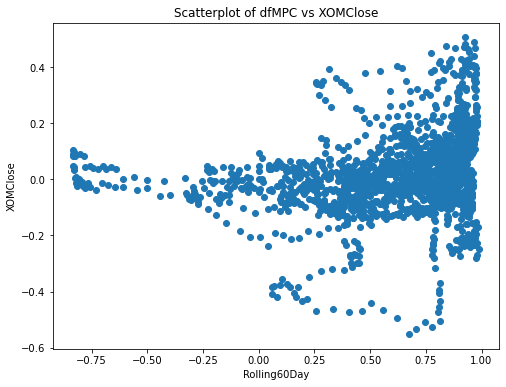

Pct Change Period is 60
Correlation between XOM and dfVLO: -0.12460906097208316



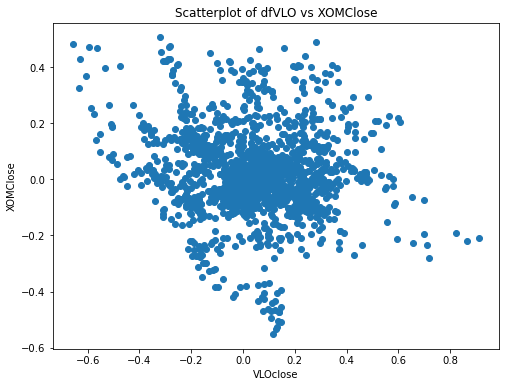

-------------------------------------------------------------
Pct Change Period is 60


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 60Day Rolling Corr of dfVLO: 0.07763253023087661



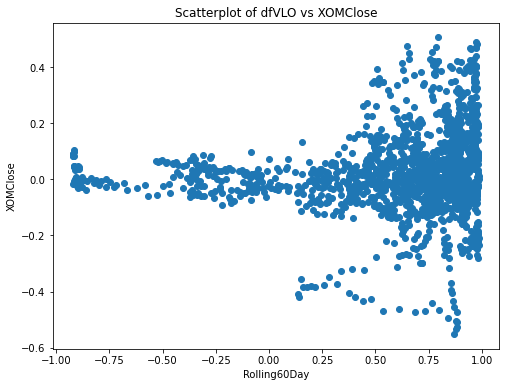

Pct Change Period is 60
Correlation between XOM and dfHES: -0.1344147401892106



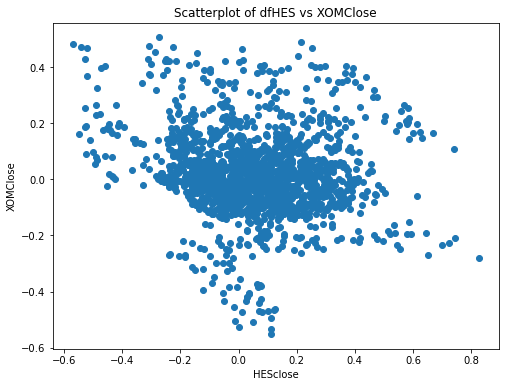

-------------------------------------------------------------
Pct Change Period is 60


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 60Day Rolling Corr of dfHES: 0.028888297561998212



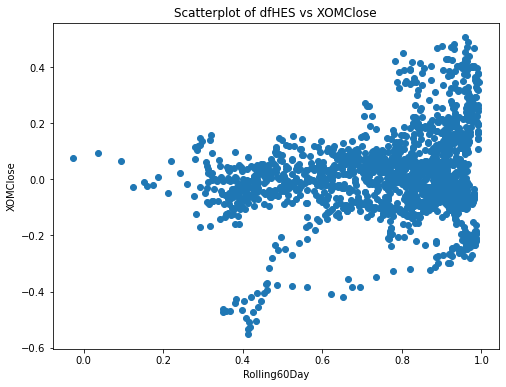

Pct Change Period is 60
Correlation between XOM and dfOXY: 0.10474500148390124



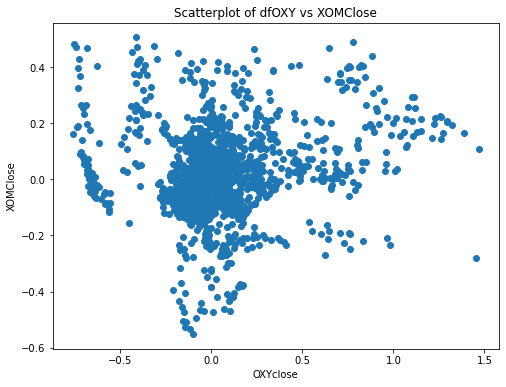

-------------------------------------------------------------
Pct Change Period is 60


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 60Day Rolling Corr of dfOXY: 0.10200253781083746



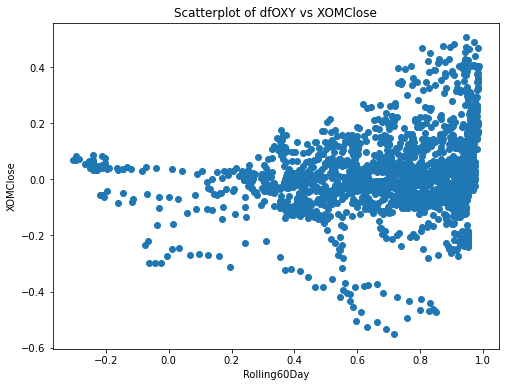

Pct Change Period is 60


<Figure size 432x288 with 0 Axes>

Correlation between XOM and dfHAL: -0.1523128762441172



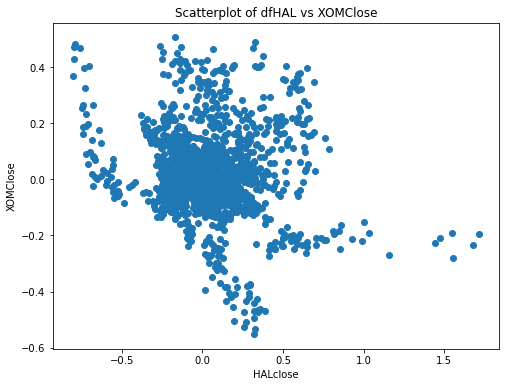

-------------------------------------------------------------
Pct Change Period is 60


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 60Day Rolling Corr of dfHAL: -0.05006217952270763



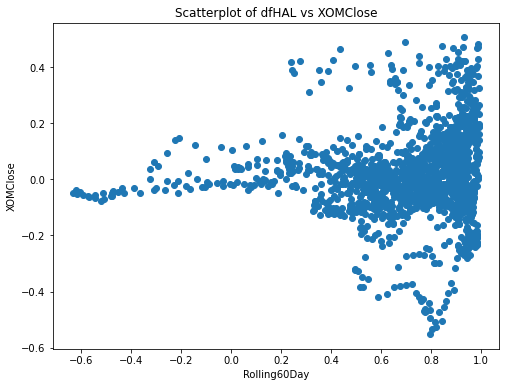

Pct Change Period is 60
Correlation between XOM and dfSGOV: -0.18492319129085263



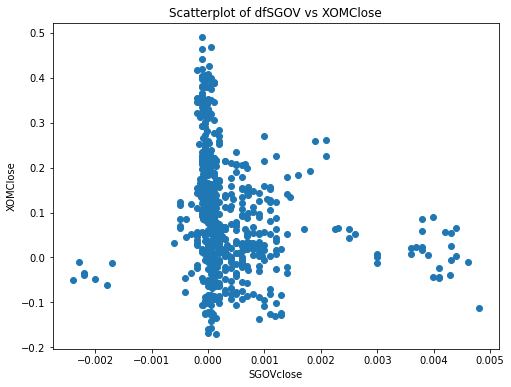

-------------------------------------------------------------
Pct Change Period is 60


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 60Day Rolling Corr of dfSGOV: 0.2777636199739473



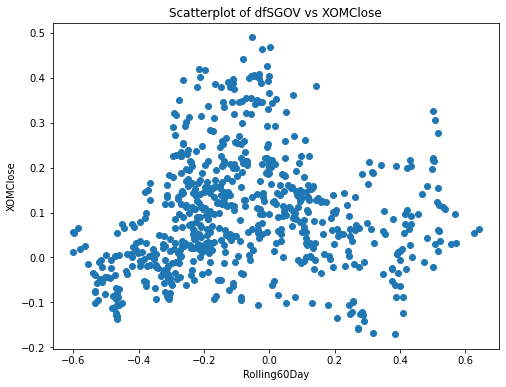

Pct Change Period is 60


<Figure size 432x288 with 0 Axes>

Correlation between XOM and dfUSO: -0.2260066905614407



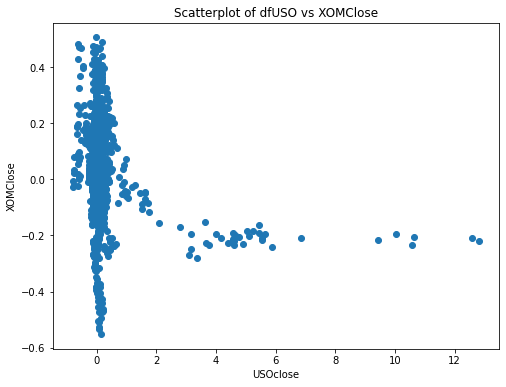

-------------------------------------------------------------
Pct Change Period is 60


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 60Day Rolling Corr of dfUSO: 0.12576618674379916



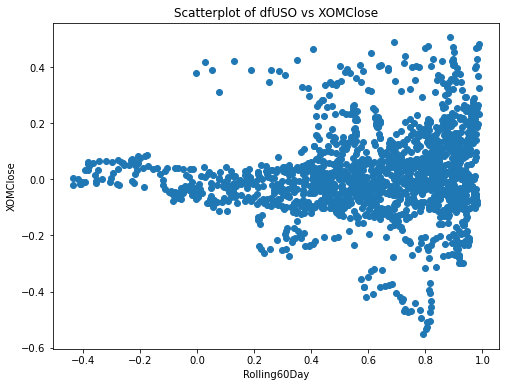

In [7]:
dataframes =dctStockDfs

display(dfYvar)

# Create scatterplots and correlation matrices

for i in range(20, 61, 5):
    for key1, df1 in dctStockDfs.items():
        # Reset the index if necessary
        ##df1 = df1.reset_index(drop=True)
        #dfYvar_aligned = dfYvar.reset_index(drop=True)

        # Concatenate the dataframes
        dfCorr = pd.concat([df1, dfYvar], join='inner', axis=1)
        #dfCorr['RollingCorr']=dfCorr.
        #stock1.pct_change().rolling(window=window).corr(stock2.pct_change())

        # Handle NaN and Inf values before calculations
        dfCorr=dfCorr.dropna()

        # Calculate percentage change
        dfCorr = dfCorr.pct_change(i)
        dfCorr[f'Rolling{str(i)}Day']=dfCorr.iloc[:, 1].rolling(i).corr(dfCorr.iloc[:, 0])
        rollingCorr=dfCorr.iloc[:, 1].corr(dfCorr.iloc[:, 2])
        dfCorr.iloc[:, 1] = dfCorr.iloc[:, 1].shift(-i)
        
        #display(dfCorr.head(40))
        # Handle NaN and Inf values after calculations
        dfCorr=dfCorr.dropna()
        #display(dfCorr)
        # Calculate and display correlation
        corr = dfCorr.iloc[:, 1].corr(dfCorr.iloc[:, 0])
        
        
        #print(f'Correlation between XOM and {key1}: {corr}')

        if abs(corr)>=0.1:
            print(f'Pct Change Period is {i}')
            plt.show()
            print(f'Correlation between XOM and {key1}: {corr}\n')
            # Create scatterplot
            plt.figure(figsize=(8, 6))
            plt.scatter(dfCorr.iloc[:, 0], dfCorr.iloc[:, 1])
            plt.title(f'Scatterplot of {key1} vs XOMClose')
            plt.xlabel(dfCorr.columns[0])
            plt.ylabel('XOMClose')
            plt.show()
        #else:
            plt.close()
            plt.clf()
        #del(dfCorr)
            print('-------------------------------------------------------------')
        #if abs(rollingCorr)>=0.1:
            print(f'Pct Change Period is {i}')
            plt.show()
            print(f'Correlation between XOM and {str(i)}Day Rolling Corr of {key1}: {rollingCorr}\n')
            # Create scatterplot
            plt.figure(figsize=(8, 6))
            plt.scatter(dfCorr.iloc[:, 2], dfCorr.iloc[:, 1])
            plt.title(f'Scatterplot of {key1} vs XOMClose')
            plt.xlabel(dfCorr.columns[2])
            plt.ylabel('XOMClose')
            plt.show()
        else:
            plt.close()
            plt.clf()
        del(dfCorr)

Correlation between XOM and dfEOG: -0.06916934235357422
P-value: 0.0026237541267634204
Shape: (1890, 3)


<Figure size 432x288 with 0 Axes>

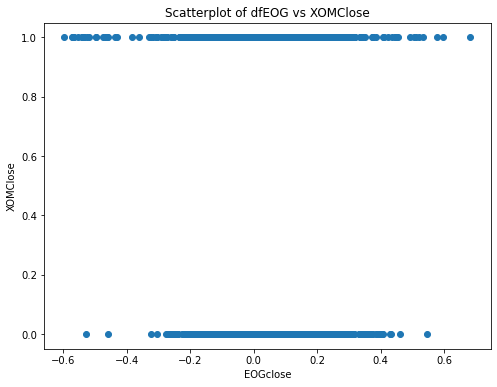

Pct Change Period is 30


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 30Day Rolling Corr of dfEOG: -0.014763781133495383

P-value: 0.0028293104580780016
Shape: (1890, 3)


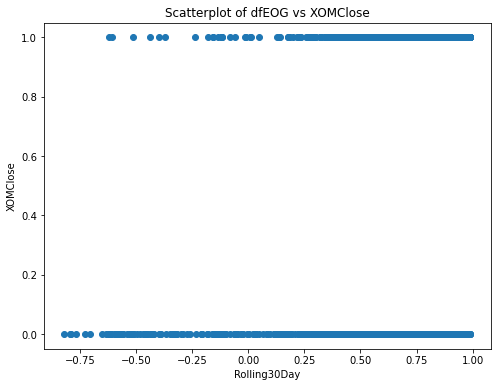

Correlation between XOM and dfPXD: -0.10986606850549185
P-value: 1.6872782462061092e-06
Shape: (1890, 3)


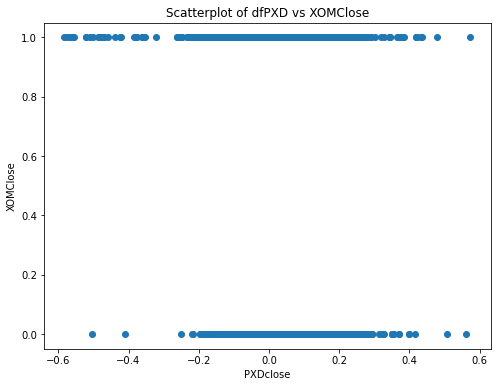

Pct Change Period is 30


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 30Day Rolling Corr of dfPXD: 0.014983769267756021

P-value: 2.464601521837014e-05
Shape: (1890, 3)


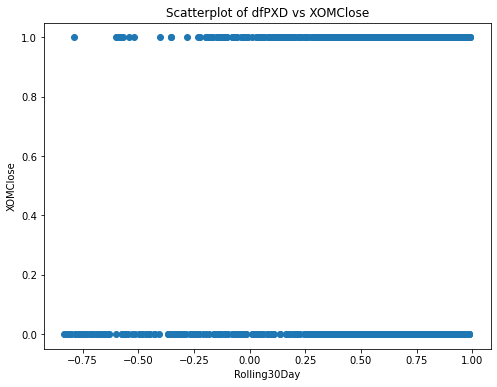

Correlation between XOM and dfSLB: -0.06536855152469802
P-value: 0.0044690814593925775
Shape: (1890, 3)


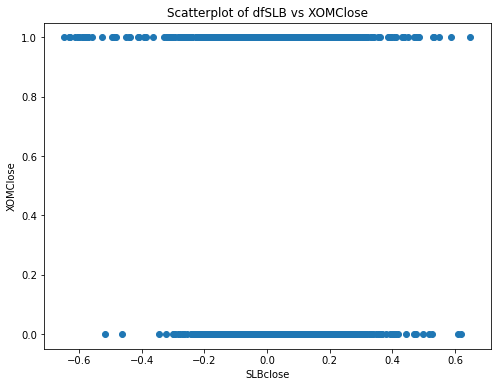

Pct Change Period is 30


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 30Day Rolling Corr of dfSLB: -0.008925761182262439

P-value: 0.11638561034777056
Shape: (1890, 3)


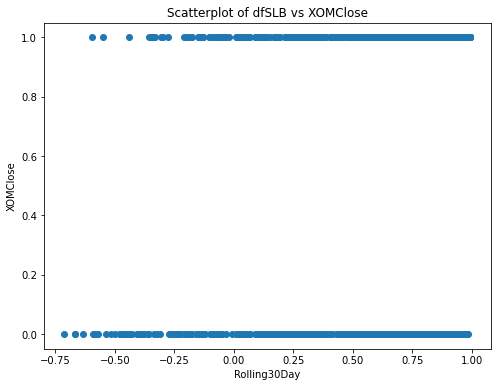

Correlation between XOM and dfHAL: -0.08302151521198053
P-value: 0.0003025122678966431
Shape: (1890, 3)


<Figure size 432x288 with 0 Axes>

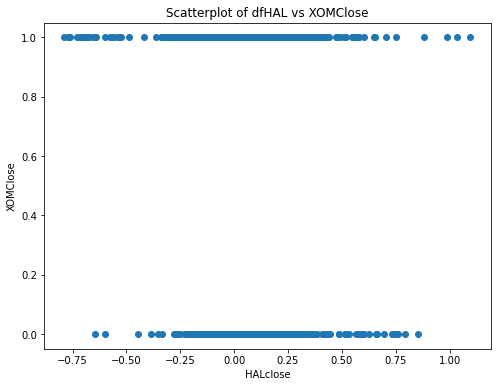

Pct Change Period is 30


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 30Day Rolling Corr of dfHAL: -0.010751293858902434

P-value: 0.00039502385395742684
Shape: (1890, 3)


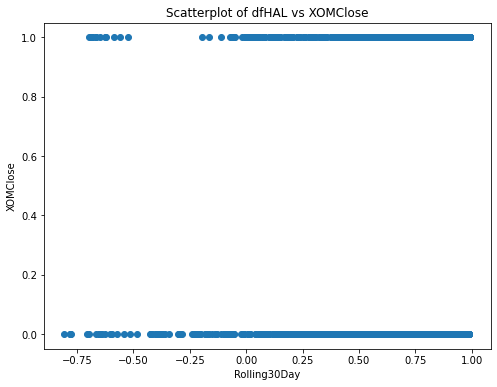

Correlation between XOM and dfTLT: -0.04765765935302352
P-value: 0.0382951308854901
Shape: (1890, 3)


<Figure size 432x288 with 0 Axes>

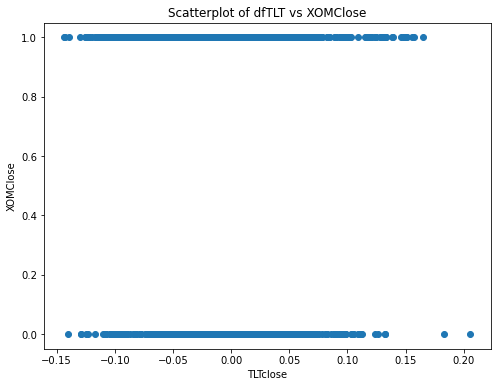

Pct Change Period is 30


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 30Day Rolling Corr of dfTLT: -0.024782942497827136

P-value: 1.1203294229146443e-24
Shape: (1890, 3)


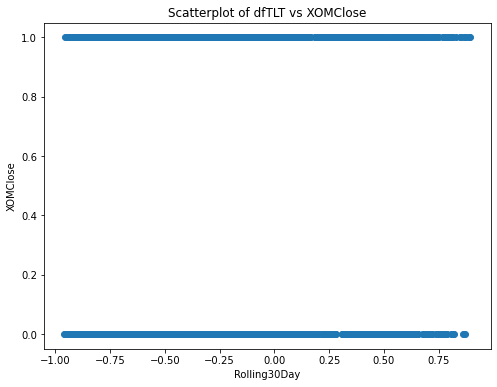

Correlation between XOM and dfUSO: -0.06883309353652363
P-value: 0.0027531830666944995
Shape: (1890, 3)


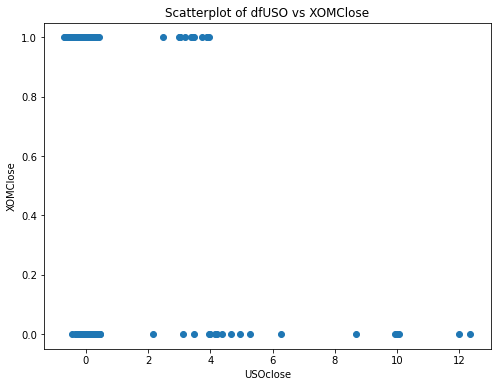

Pct Change Period is 30


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 30Day Rolling Corr of dfUSO: -0.008563314380309862

P-value: 0.0007159093437477586
Shape: (1890, 3)


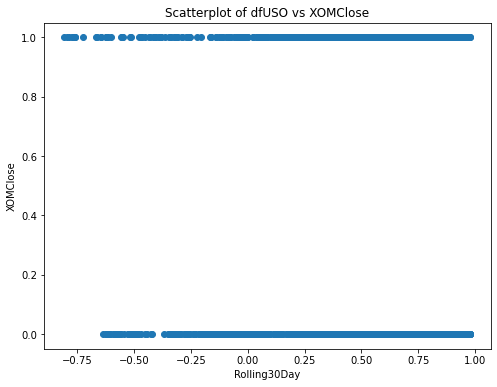

Correlation between XOM and dfEOG: -0.06022225214748697
P-value: 0.009006465229537339
Shape: (1880, 3)


<Figure size 432x288 with 0 Axes>

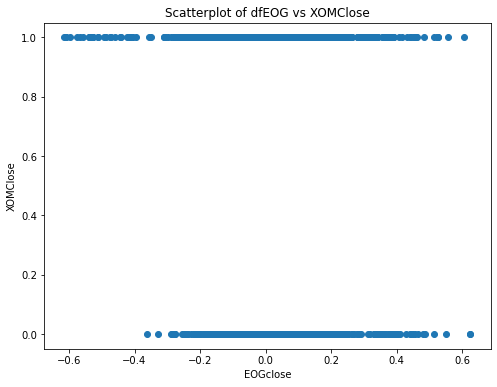

Pct Change Period is 35


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 35Day Rolling Corr of dfEOG: 0.04429440393780534

P-value: 0.07915078908403839
Shape: (1880, 3)


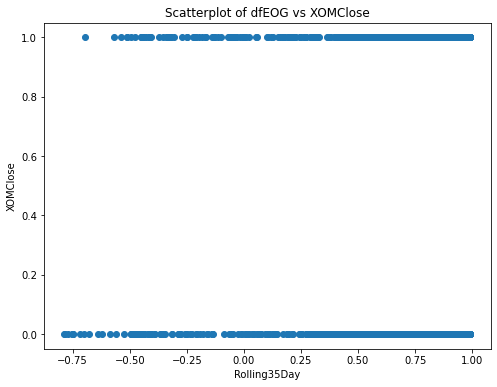

Correlation between XOM and dfPXD: -0.0908879402734074
P-value: 7.934957969701102e-05
Shape: (1880, 3)


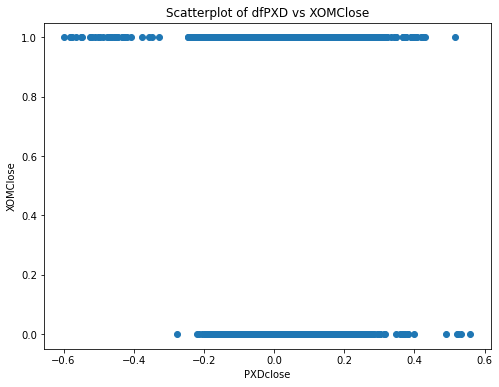

Pct Change Period is 35


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 35Day Rolling Corr of dfPXD: 0.04682227622391119

P-value: 8.197700382149507e-05
Shape: (1880, 3)


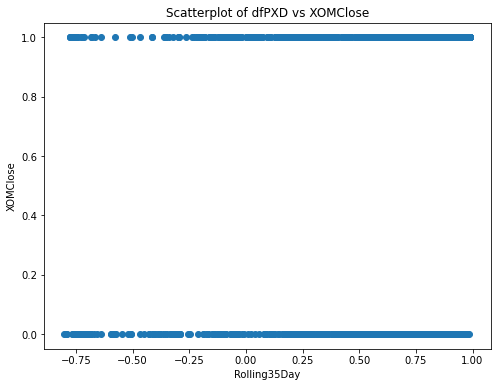

Correlation between XOM and dfSLB: -0.06442963697734726
P-value: 0.005195618982330619
Shape: (1880, 3)


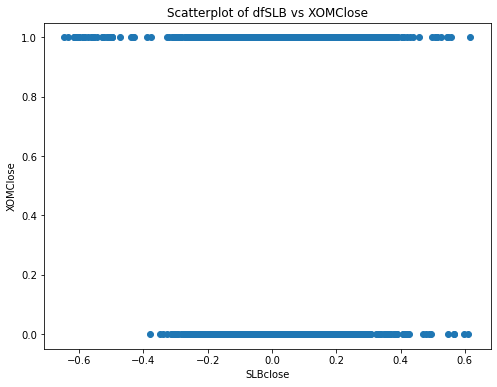

Pct Change Period is 35


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 35Day Rolling Corr of dfSLB: 0.018851927584263094

P-value: 0.0010418097913616894
Shape: (1880, 3)


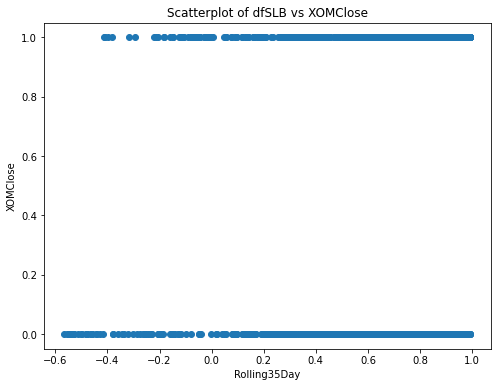

Correlation between XOM and dfPSX: -0.045434911374136674
P-value: 0.04887072643536003
Shape: (1880, 3)


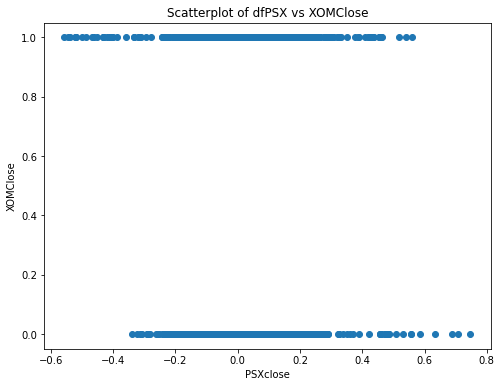

Pct Change Period is 35


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 35Day Rolling Corr of dfPSX: 0.0380491195384805

P-value: 0.22316564689739532
Shape: (1880, 3)


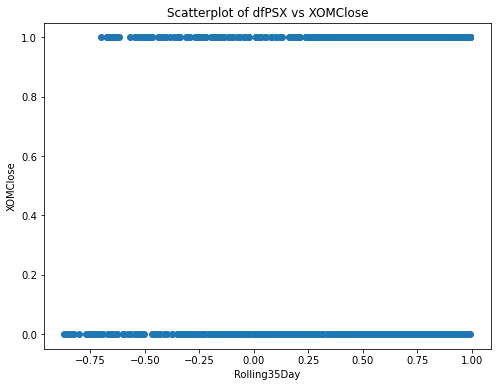

Correlation between XOM and dfMPC: -0.05237242054167883
P-value: 0.02315532010059958
Shape: (1880, 3)


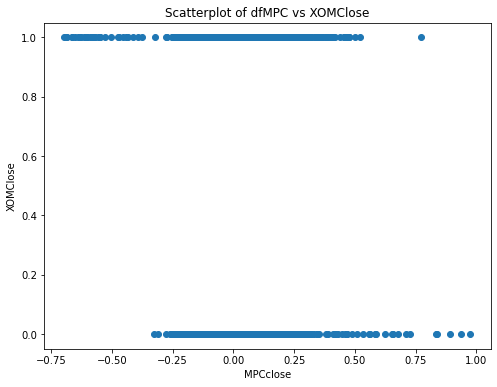

Pct Change Period is 35


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 35Day Rolling Corr of dfMPC: 0.036342011052982445

P-value: 0.1445487492774215
Shape: (1880, 3)


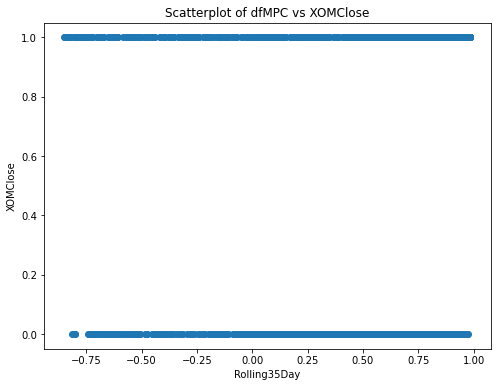

Correlation between XOM and dfHES: -0.05021856144478415
P-value: 0.029454420172729916
Shape: (1880, 3)


<Figure size 432x288 with 0 Axes>

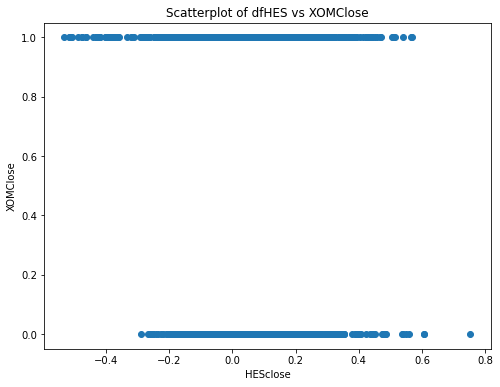

Pct Change Period is 35


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 35Day Rolling Corr of dfHES: 0.024363843309137136

P-value: 0.032642161365583455
Shape: (1880, 3)


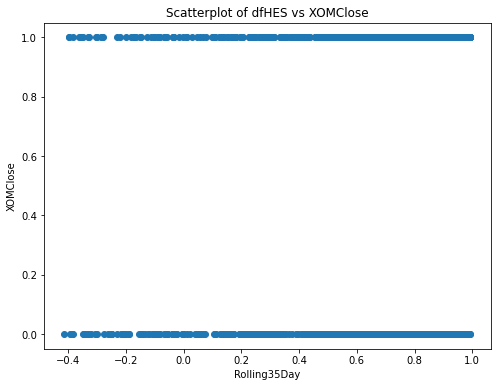

Correlation between XOM and dfHAL: -0.10805467909137637
P-value: 2.6559451703284358e-06
Shape: (1880, 3)


<Figure size 432x288 with 0 Axes>

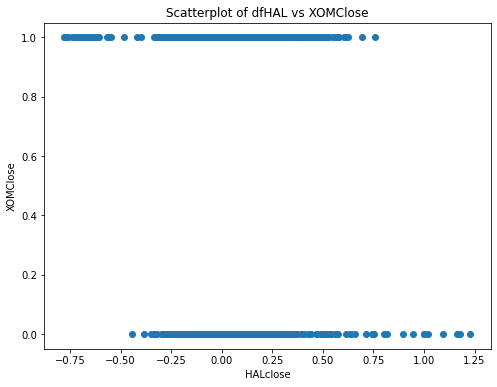

Pct Change Period is 35


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 35Day Rolling Corr of dfHAL: -0.004849197072843399

P-value: 1.2808169798996217e-05
Shape: (1880, 3)


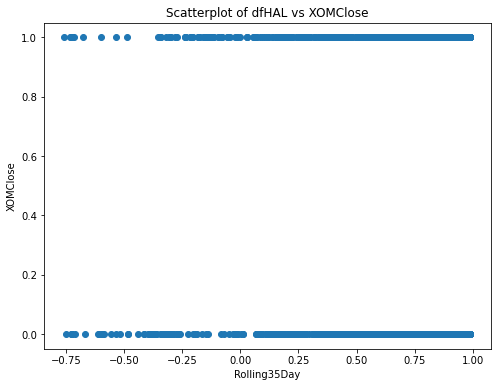

Correlation between XOM and dfTLT: -0.06478687210974046
P-value: 0.004951440249340004
Shape: (1880, 3)


<Figure size 432x288 with 0 Axes>

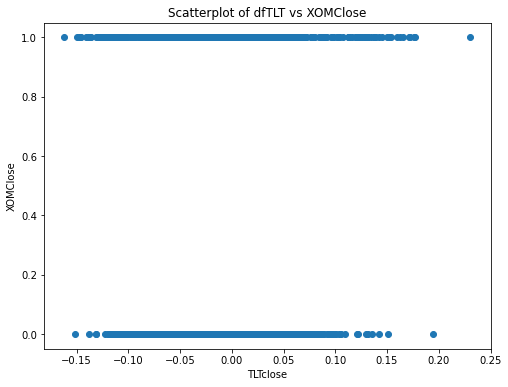

Pct Change Period is 35


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 35Day Rolling Corr of dfTLT: -0.05312828958413405

P-value: 1.427162150951635e-16
Shape: (1880, 3)


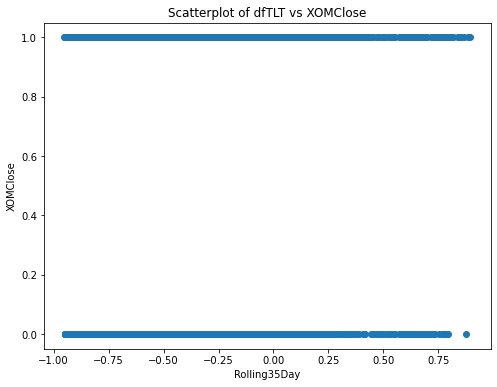

Correlation between XOM and dfUSO: -0.11005981302772185
P-value: 1.7231717606194643e-06
Shape: (1880, 3)


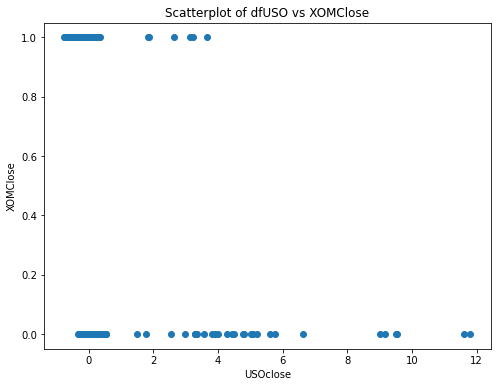

Pct Change Period is 35


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 35Day Rolling Corr of dfUSO: 0.03576375357478589

P-value: 0.8122062742948256
Shape: (1880, 3)


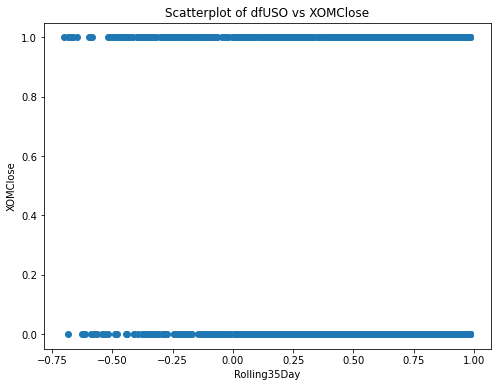

Correlation between XOM and dfPXD: -0.04895133858858715
P-value: 0.0342869663232908
Shape: (1870, 3)


<Figure size 432x288 with 0 Axes>

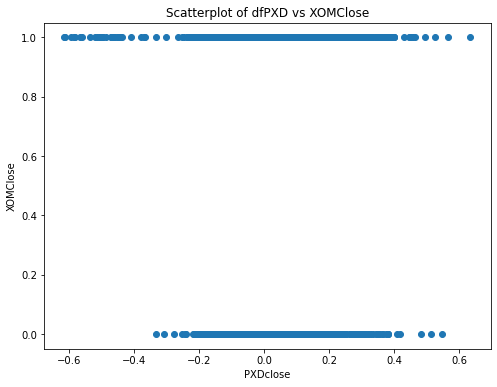

Pct Change Period is 40


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 40Day Rolling Corr of dfPXD: 0.08767661905770621

P-value: 0.2485970624446025
Shape: (1870, 3)


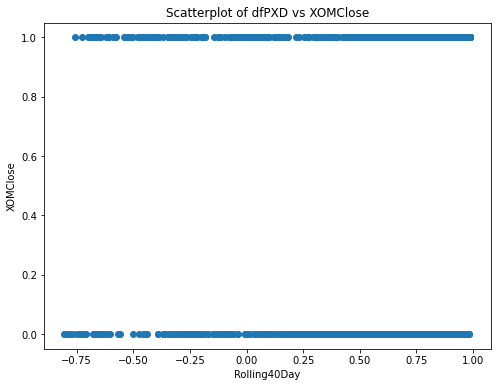

Correlation between XOM and dfSLB: -0.060574833712847026
P-value: 0.008789823981137479
Shape: (1870, 3)


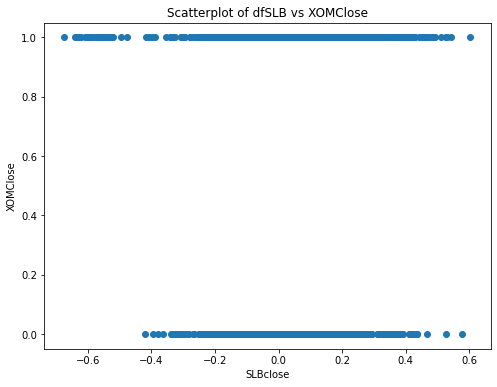

Pct Change Period is 40


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 40Day Rolling Corr of dfSLB: -0.006924579345961824

P-value: 0.002947654908099696
Shape: (1870, 3)


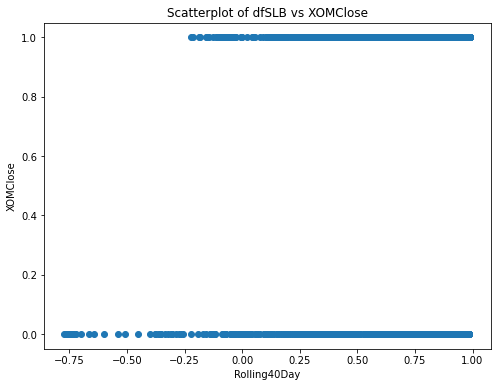

Correlation between XOM and dfPSX: -0.04700329584024955
P-value: 0.042118128458233386
Shape: (1870, 3)


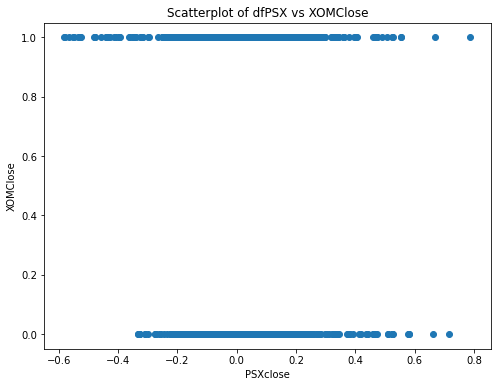

Pct Change Period is 40


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 40Day Rolling Corr of dfPSX: 0.051088341508423535

P-value: 0.02417153977804287
Shape: (1870, 3)


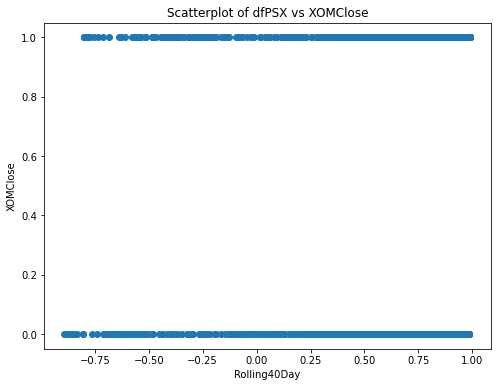

Correlation between XOM and dfMPC: -0.04576790827157825
P-value: 0.04782974618739443
Shape: (1870, 3)


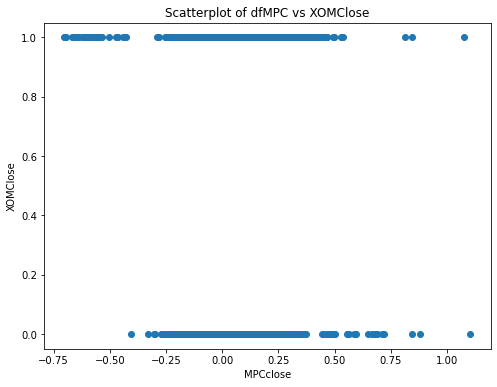

Pct Change Period is 40


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 40Day Rolling Corr of dfMPC: 0.04189121885549621

P-value: 0.021736711354378078
Shape: (1870, 3)


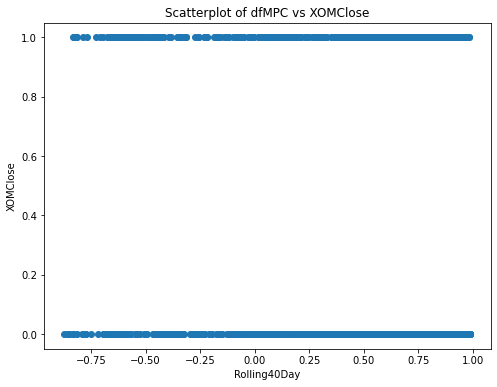

Correlation between XOM and dfHES: -0.07691634022393504
P-value: 0.0008720859348639053
Shape: (1870, 3)


<Figure size 432x288 with 0 Axes>

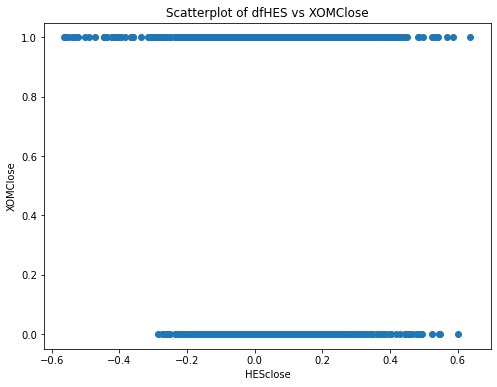

Pct Change Period is 40


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 40Day Rolling Corr of dfHES: 0.04095462982162785

P-value: 0.00048482536241555203
Shape: (1870, 3)


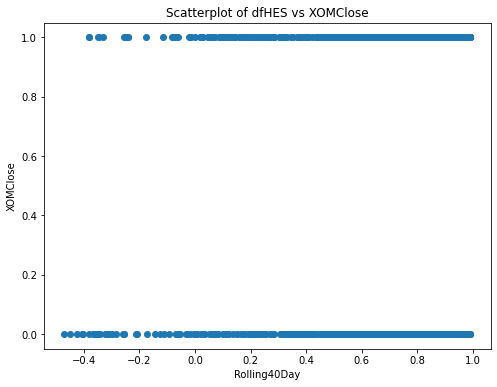

Correlation between XOM and dfOXY: 0.04608577296853779
P-value: 0.046301304647839936
Shape: (1870, 3)


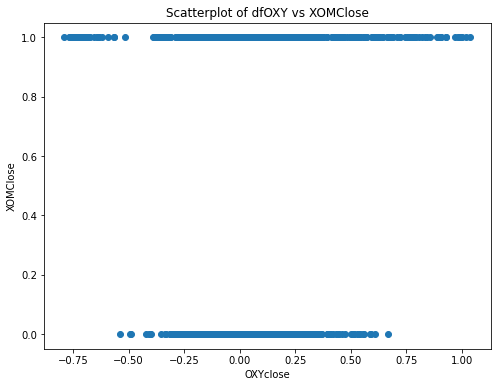

Pct Change Period is 40


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 40Day Rolling Corr of dfOXY: 0.1454203648535728

P-value: 0.3221831585079527
Shape: (1870, 3)


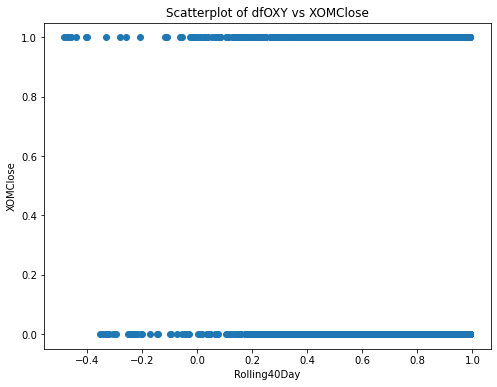

Correlation between XOM and dfHAL: -0.08584210413519967
P-value: 0.00020200780927687919
Shape: (1870, 3)


<Figure size 432x288 with 0 Axes>

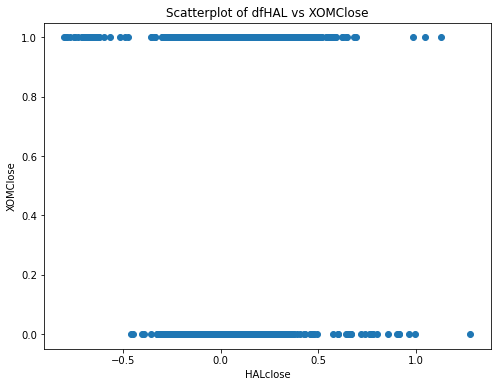

Pct Change Period is 40


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 40Day Rolling Corr of dfHAL: -0.017526611595660727

P-value: 1.5039905342878056e-06
Shape: (1870, 3)


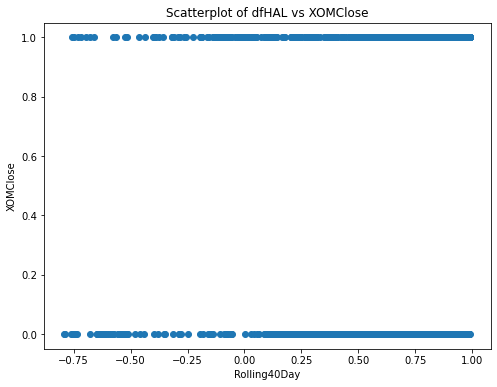

Correlation between XOM and dfSGOV: -0.11042395260755852
P-value: 0.002254168595660037
Shape: (763, 3)


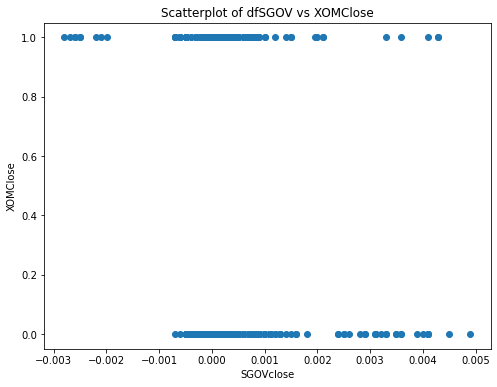

Pct Change Period is 40


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 40Day Rolling Corr of dfSGOV: 0.055369218958410335

P-value: 0.6445457218968619
Shape: (763, 3)


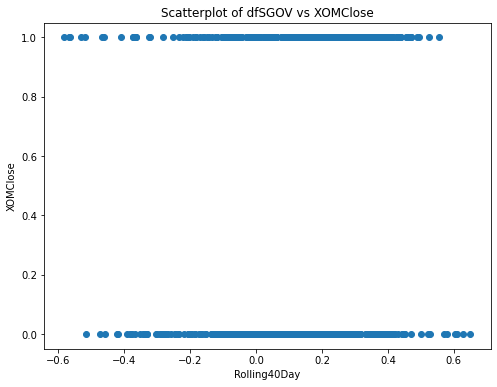

Correlation between XOM and dfTLT: -0.07124306051768022
P-value: 0.002051617527322334
Shape: (1870, 3)


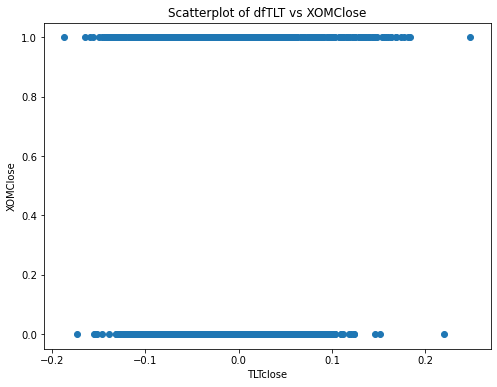

Pct Change Period is 40


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 40Day Rolling Corr of dfTLT: -0.0014405758846053108

P-value: 1.6141321069895273e-25
Shape: (1870, 3)


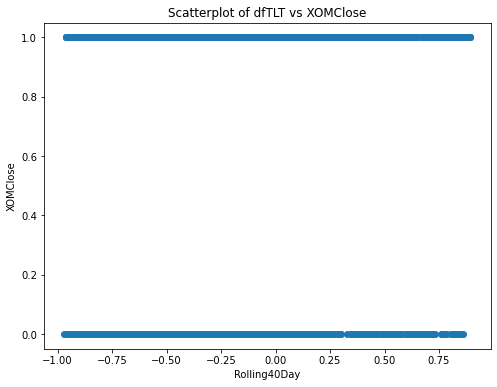

Correlation between XOM and dfUSO: -0.1090181037838396
P-value: 2.298197319052897e-06
Shape: (1870, 3)


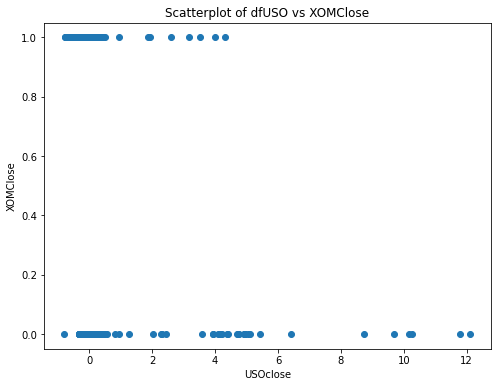

Pct Change Period is 40


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 40Day Rolling Corr of dfUSO: 0.07410761851886932

P-value: 0.12732444527466807
Shape: (1870, 3)


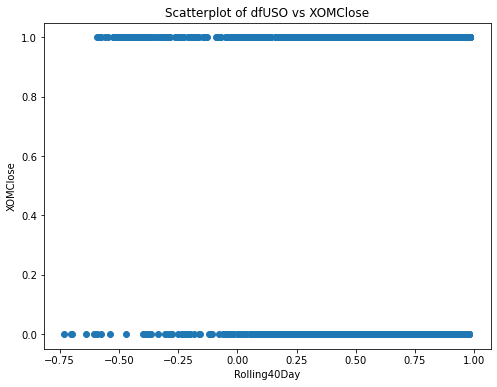

Correlation between XOM and dfPXD: -0.04783970415388466
P-value: 0.03911154030759485
Shape: (1860, 3)


<Figure size 432x288 with 0 Axes>

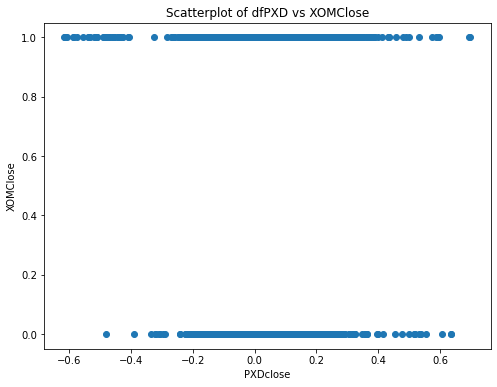

Pct Change Period is 45


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 45Day Rolling Corr of dfPXD: 0.11480317885690697

P-value: 0.003505518005923896
Shape: (1860, 3)


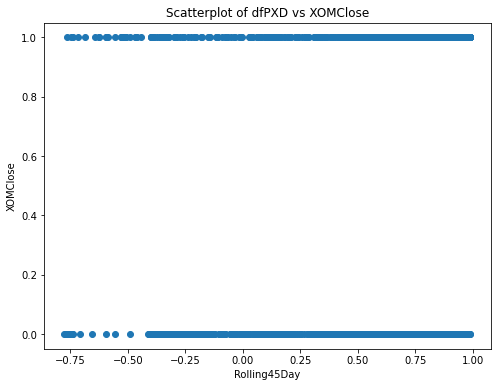

Correlation between XOM and dfSLB: -0.05910058946811507
P-value: 0.010791198667619054
Shape: (1860, 3)


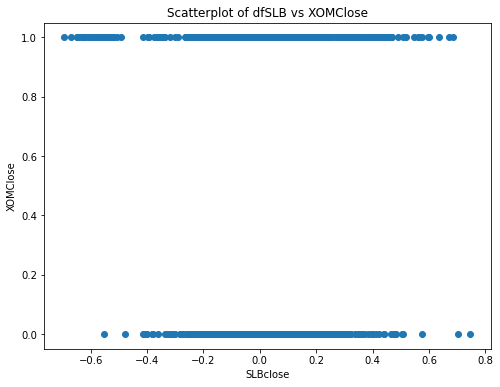

Pct Change Period is 45


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 45Day Rolling Corr of dfSLB: 0.0028782495813880218

P-value: 0.1505227122247521
Shape: (1860, 3)


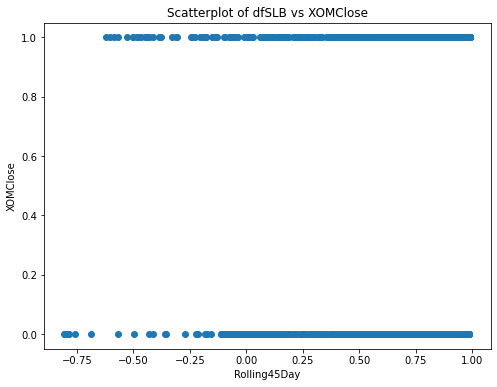

Correlation between XOM and dfMPC: -0.06795228828312558
P-value: 0.0033673645888673428
Shape: (1860, 3)


<Figure size 432x288 with 0 Axes>

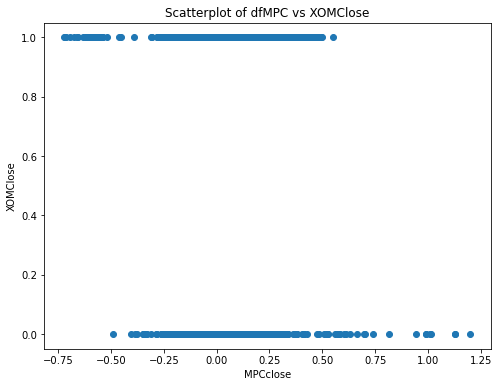

Pct Change Period is 45


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 45Day Rolling Corr of dfMPC: 0.038744305834083816

P-value: 0.007069382930160091
Shape: (1860, 3)


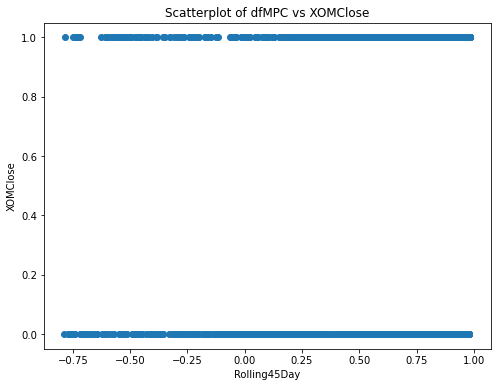

Correlation between XOM and dfHES: -0.10018149720844949
P-value: 1.5006836642479104e-05
Shape: (1860, 3)


<Figure size 432x288 with 0 Axes>

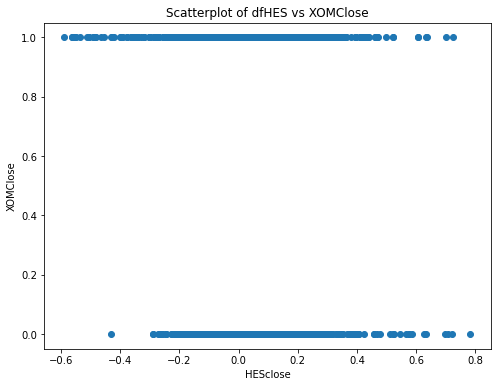

Pct Change Period is 45


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 45Day Rolling Corr of dfHES: 0.04418926124381579

P-value: 8.136792503658041e-05
Shape: (1860, 3)


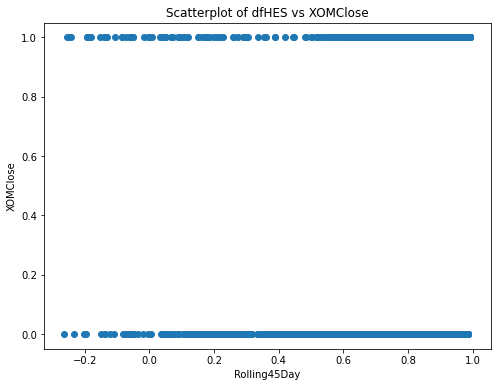

Correlation between XOM and dfOXY: 0.06506256261869814
P-value: 0.004999158624507803
Shape: (1860, 3)


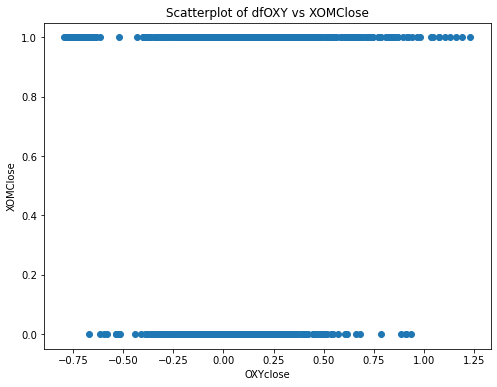

Pct Change Period is 45


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 45Day Rolling Corr of dfOXY: 0.1415556869462378

P-value: 0.11071306176635848
Shape: (1860, 3)


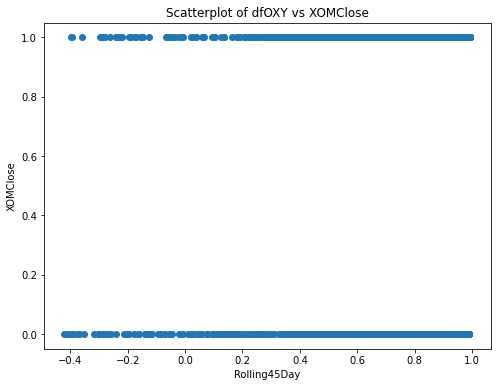

Correlation between XOM and dfHAL: -0.09709662207168665
P-value: 2.732873518230006e-05
Shape: (1860, 3)


<Figure size 432x288 with 0 Axes>

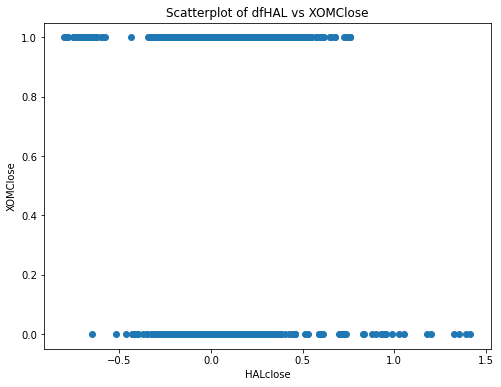

Pct Change Period is 45


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 45Day Rolling Corr of dfHAL: -0.028972398461808713

P-value: 2.7248499427677027e-05
Shape: (1860, 3)


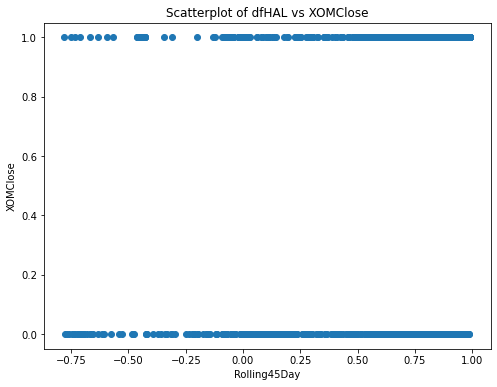

Correlation between XOM and dfSGOV: -0.07751927921214583
P-value: 0.03343156424650059
Shape: (753, 3)


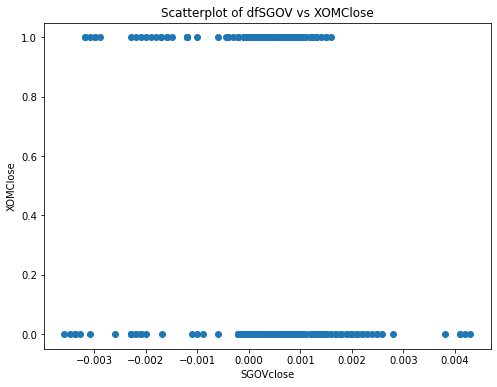

Pct Change Period is 45


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 45Day Rolling Corr of dfSGOV: 0.18798808259551972

P-value: 0.3661356600950564
Shape: (753, 3)


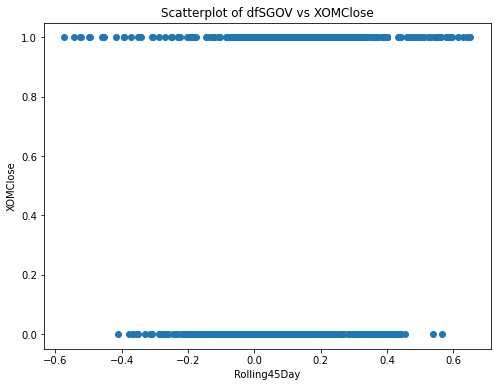

Correlation between XOM and dfTLT: -0.07502402703095581
P-value: 0.0012036914199114637
Shape: (1860, 3)


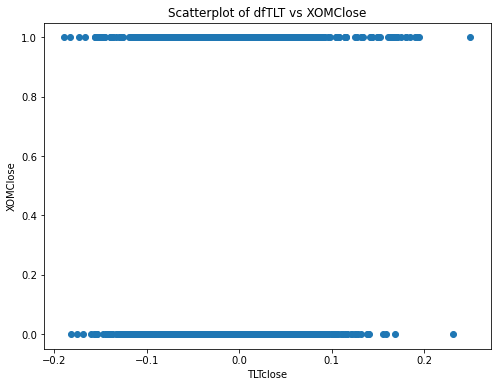

Pct Change Period is 45


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 45Day Rolling Corr of dfTLT: 0.013492909354560625

P-value: 2.2779209564865704e-22
Shape: (1860, 3)


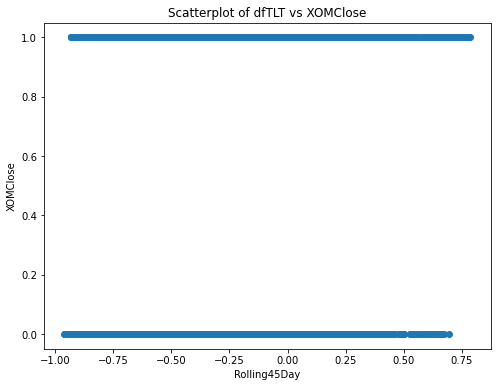

Correlation between XOM and dfUSO: -0.13202255388634798
P-value: 1.0968091684575939e-08
Shape: (1860, 3)


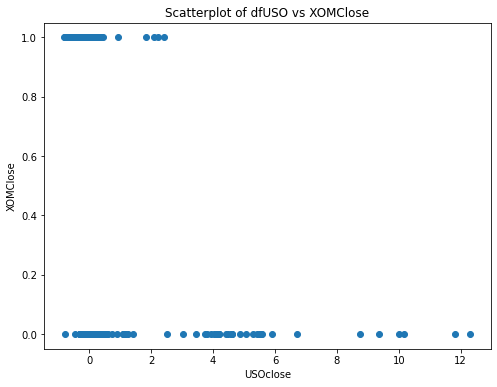

Pct Change Period is 45


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 45Day Rolling Corr of dfUSO: 0.11028825924101662

P-value: 0.017100351457477393
Shape: (1860, 3)


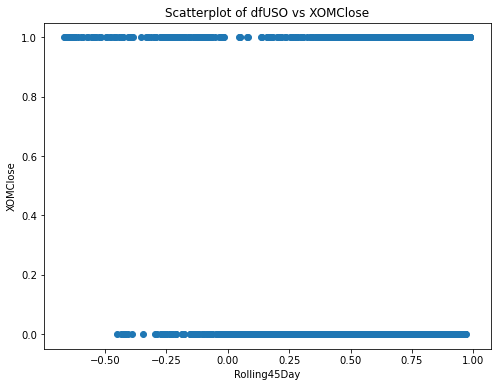

Correlation between XOM and dfPXD: -0.0679635244514275
P-value: 0.003448683132898887
Shape: (1850, 3)


<Figure size 432x288 with 0 Axes>

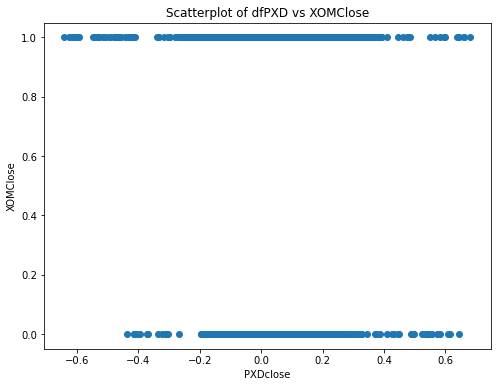

Pct Change Period is 50


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 50Day Rolling Corr of dfPXD: 0.13345742340325928

P-value: 7.788839198834449e-09
Shape: (1850, 3)


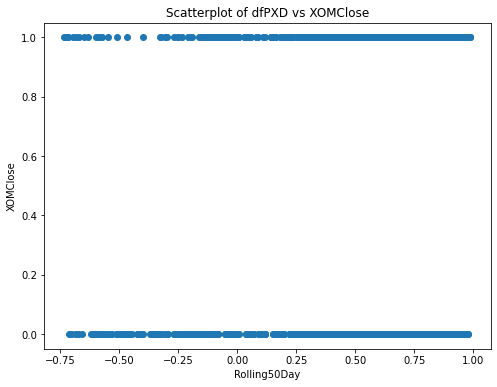

Correlation between XOM and dfSLB: -0.06367608595247079
P-value: 0.006148752787543543
Shape: (1850, 3)


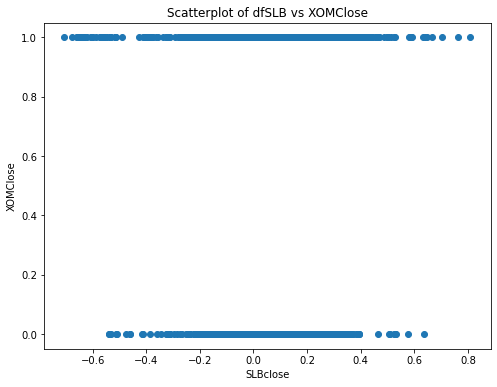

Pct Change Period is 50


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 50Day Rolling Corr of dfSLB: 0.02496022834722586

P-value: 0.12679605977769454
Shape: (1850, 3)


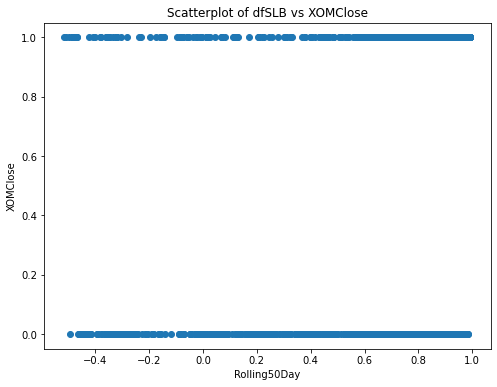

Correlation between XOM and dfPSX: -0.058102767671151086
P-value: 0.012436267757950549
Shape: (1850, 3)


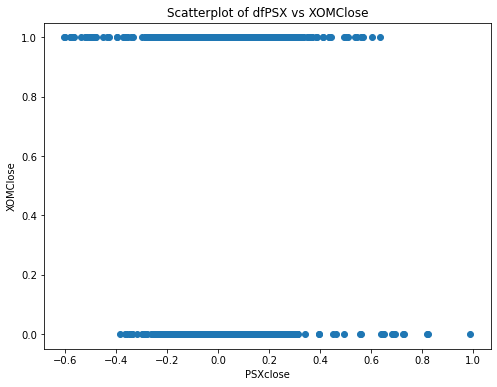

Pct Change Period is 50


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 50Day Rolling Corr of dfPSX: 0.1177260786592897

P-value: 0.015362738841458763
Shape: (1850, 3)


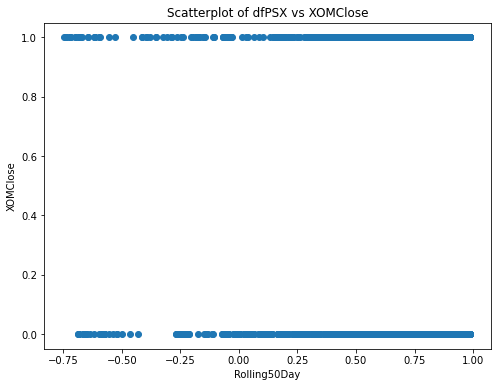

Correlation between XOM and dfMPC: -0.08801923485856114
P-value: 0.00015025323430843232
Shape: (1850, 3)


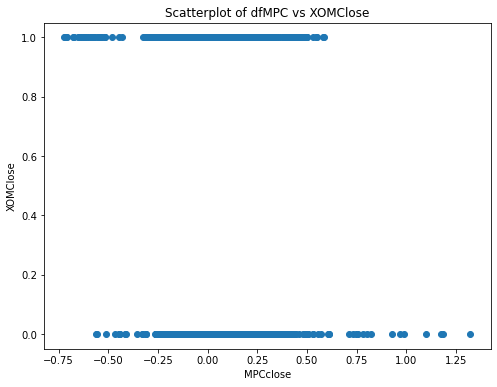

Pct Change Period is 50


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 50Day Rolling Corr of dfMPC: 0.06394596012163627

P-value: 0.06401610945663354
Shape: (1850, 3)


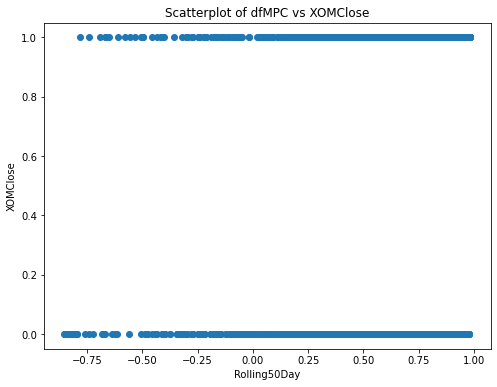

Correlation between XOM and dfVLO: -0.05933188085910395
P-value: 0.010695762930722266
Shape: (1850, 3)


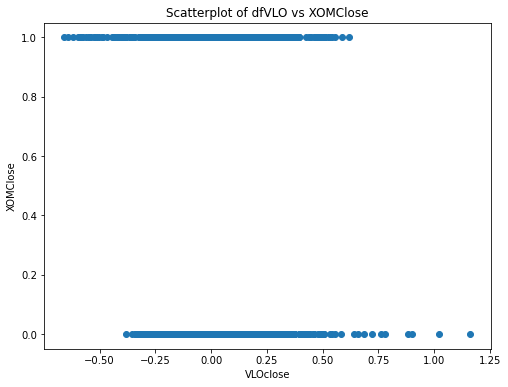

Pct Change Period is 50


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 50Day Rolling Corr of dfVLO: 0.10949395185915223

P-value: 0.031244123031337584
Shape: (1850, 3)


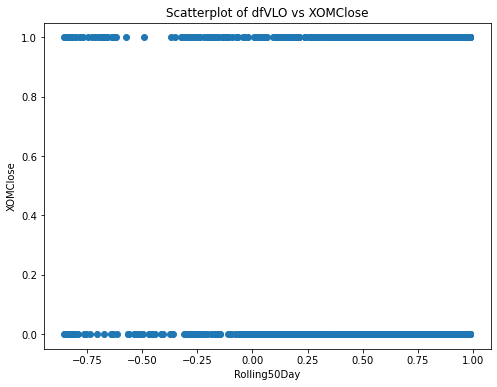

Correlation between XOM and dfHES: -0.1197283044222254
P-value: 2.406748618371034e-07
Shape: (1850, 3)


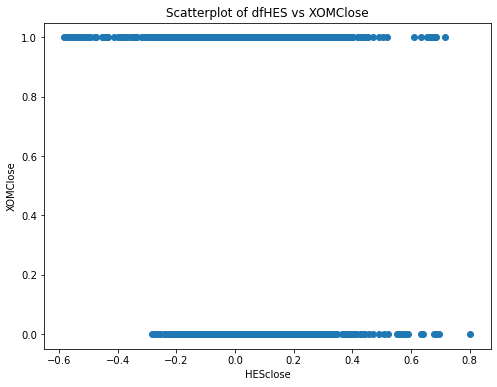

Pct Change Period is 50


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 50Day Rolling Corr of dfHES: 0.0874628653356377

P-value: 7.050664143551692e-05
Shape: (1850, 3)


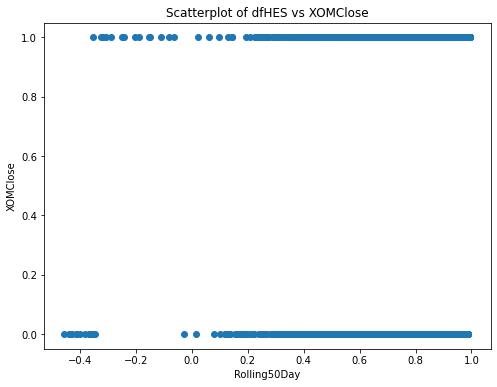

Correlation between XOM and dfOXY: 0.0738359107637637
P-value: 0.001482974981738181
Shape: (1850, 3)


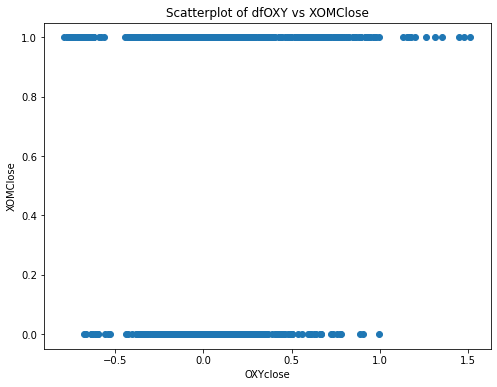

Pct Change Period is 50


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 50Day Rolling Corr of dfOXY: 0.12198934637367455

P-value: 0.0006185721453116707
Shape: (1850, 3)


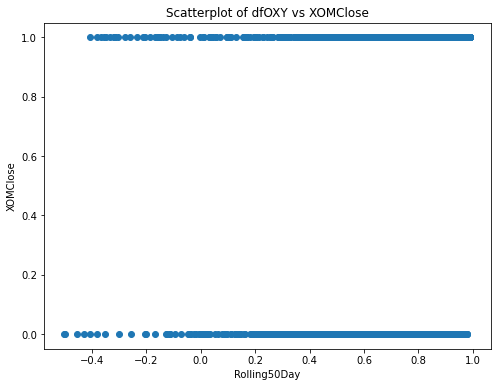

Correlation between XOM and dfHAL: -0.115891509797025
P-value: 5.78791708262864e-07
Shape: (1850, 3)


<Figure size 432x288 with 0 Axes>

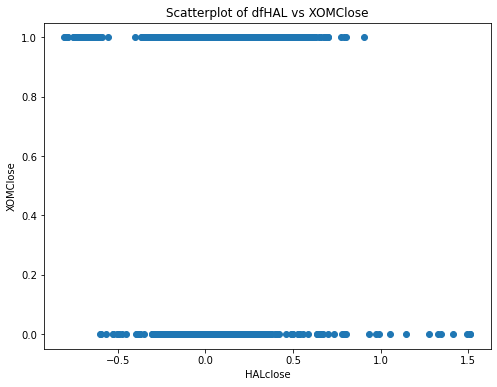

Pct Change Period is 50


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 50Day Rolling Corr of dfHAL: -0.023805374833233108

P-value: 5.875514329462122e-07
Shape: (1850, 3)


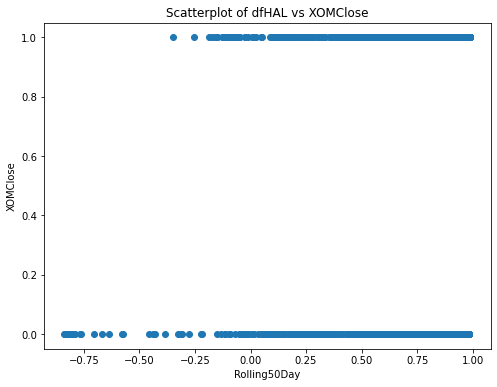

Correlation between XOM and dfSGOV: -0.07566807539479592
P-value: 0.039203296464521205
Shape: (743, 3)


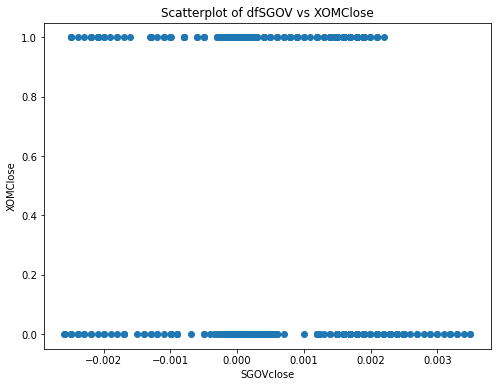

Pct Change Period is 50


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 50Day Rolling Corr of dfSGOV: 0.0695840651327177

P-value: 0.43509404261253
Shape: (743, 3)


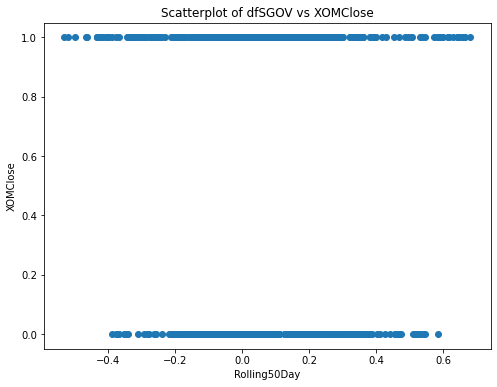

Correlation between XOM and dfTLT: -0.08573663904616874
P-value: 0.00022251542954142435
Shape: (1850, 3)


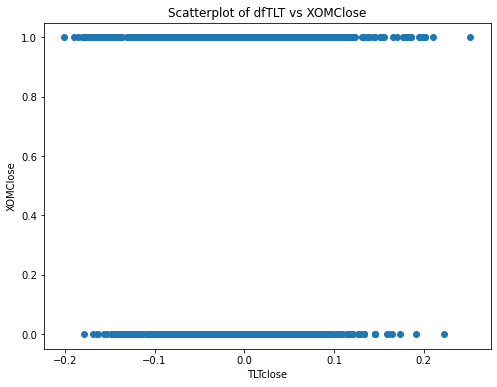

Pct Change Period is 50


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 50Day Rolling Corr of dfTLT: -0.0011909693074662645

P-value: 1.1334176064432115e-20
Shape: (1850, 3)


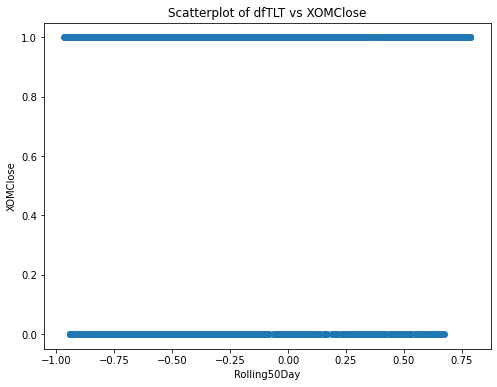

Correlation between XOM and dfUSO: -0.14324906111429334
P-value: 6.04875404926539e-10
Shape: (1850, 3)


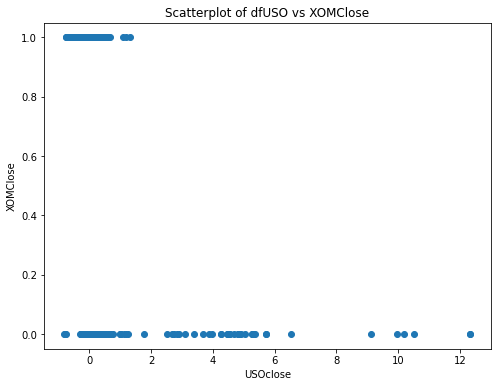

Pct Change Period is 50


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 50Day Rolling Corr of dfUSO: 0.12107974110488302

P-value: 0.0023938907057488245
Shape: (1850, 3)


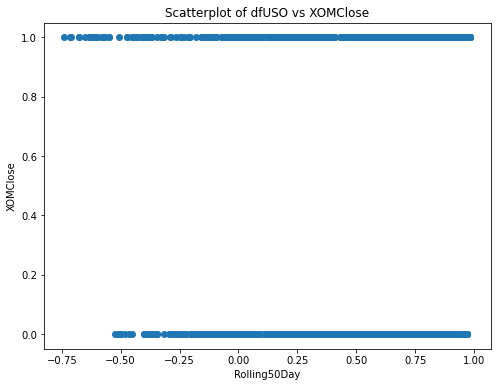

Correlation between XOM and dfPXD: -0.05166437576641707
P-value: 0.02668267810280821
Shape: (1840, 3)


<Figure size 432x288 with 0 Axes>

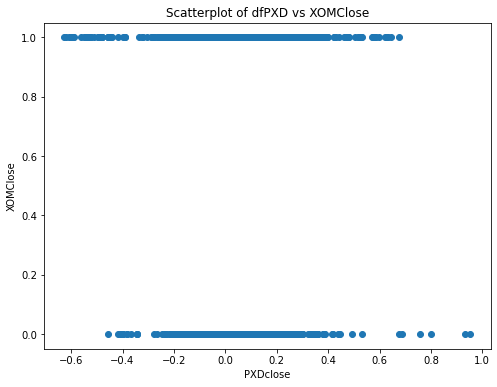

Pct Change Period is 55


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 55Day Rolling Corr of dfPXD: 0.1689704490801818

P-value: 1.9855865612461916e-11
Shape: (1840, 3)


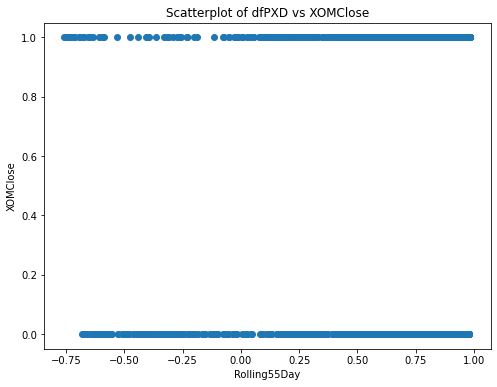

Correlation between XOM and dfSLB: -0.05749393353273901
P-value: 0.013641045642051137
Shape: (1840, 3)


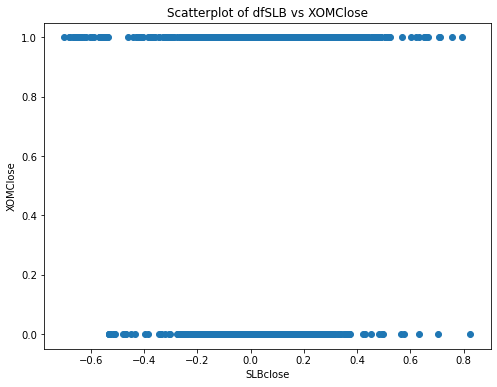

Pct Change Period is 55


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 55Day Rolling Corr of dfSLB: 0.05635586947523364

P-value: 0.062215462902036354
Shape: (1840, 3)


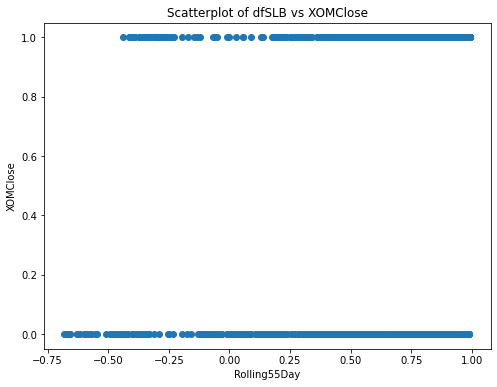

Correlation between XOM and dfPSX: -0.08575039193354442
P-value: 0.00023089725132817616
Shape: (1840, 3)


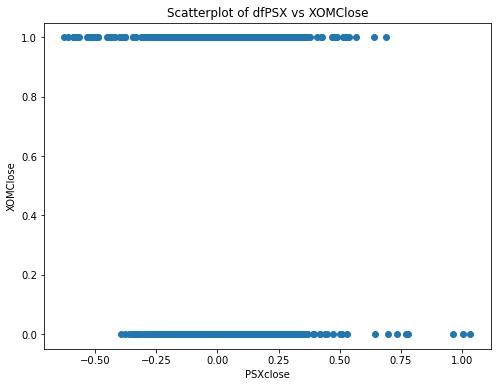

Pct Change Period is 55


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 55Day Rolling Corr of dfPSX: 0.10375877378245989

P-value: 0.8664505315924497
Shape: (1840, 3)


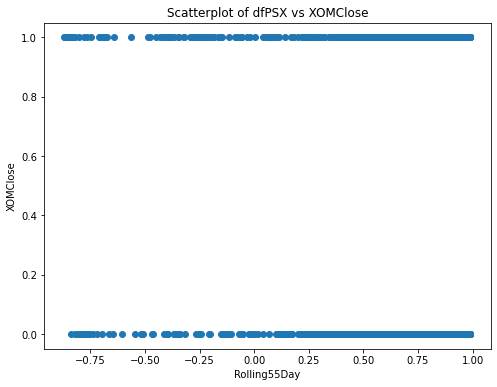

Correlation between XOM and dfMPC: -0.10942924112106187
P-value: 2.539444532070523e-06
Shape: (1840, 3)


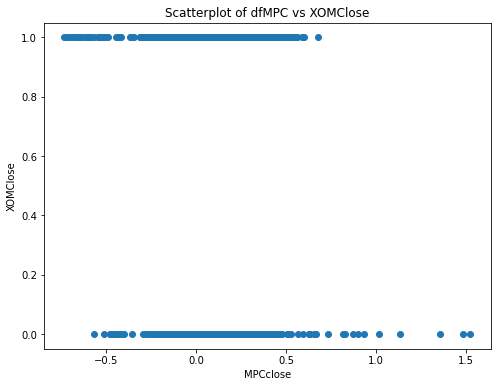

Pct Change Period is 55


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 55Day Rolling Corr of dfMPC: 0.09005640285838304

P-value: 0.5608230232264502
Shape: (1840, 3)


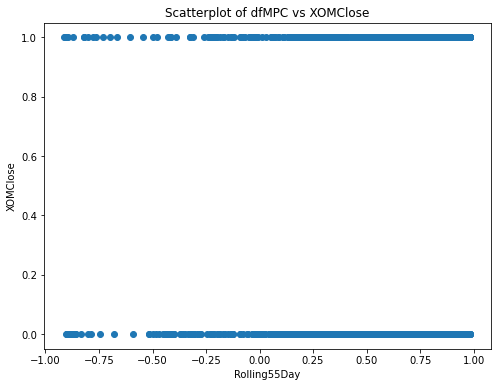

Correlation between XOM and dfVLO: -0.09203299702658838
P-value: 7.702085430027243e-05
Shape: (1840, 3)


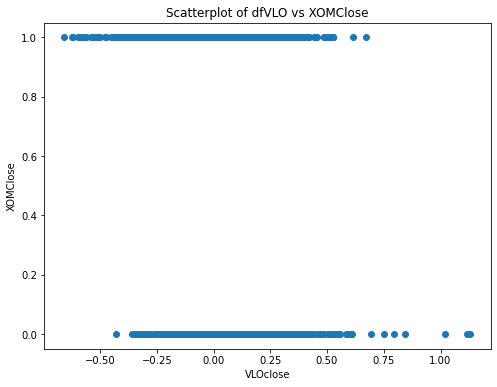

Pct Change Period is 55


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 55Day Rolling Corr of dfVLO: 0.11368077316823291

P-value: 0.4913538024158214
Shape: (1840, 3)


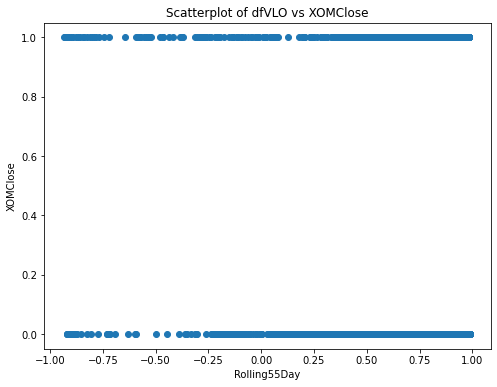

Correlation between XOM and dfHES: -0.11850061154902594
P-value: 3.4393939474679133e-07
Shape: (1840, 3)


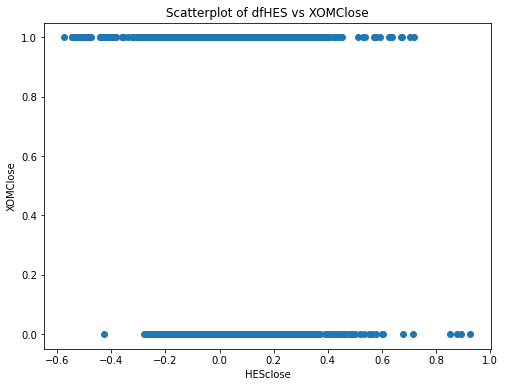

Pct Change Period is 55


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 55Day Rolling Corr of dfHES: 0.08741051237034884

P-value: 0.005092356841737668
Shape: (1840, 3)


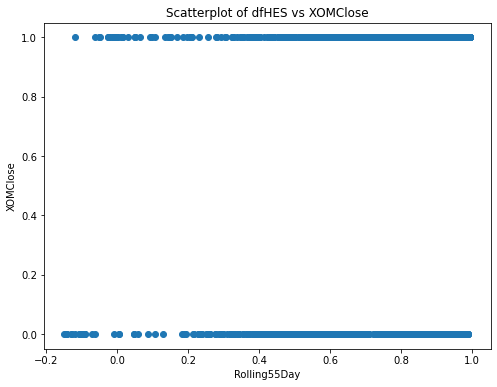

Correlation between XOM and dfOXY: 0.09545561145757148
P-value: 4.1105813058578445e-05
Shape: (1840, 3)


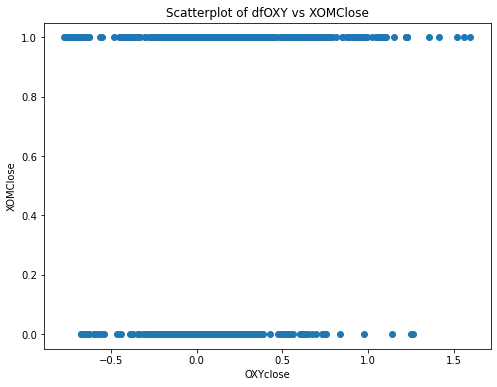

Pct Change Period is 55


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 55Day Rolling Corr of dfOXY: 0.11027067987380834

P-value: 5.177052886234686e-07
Shape: (1840, 3)


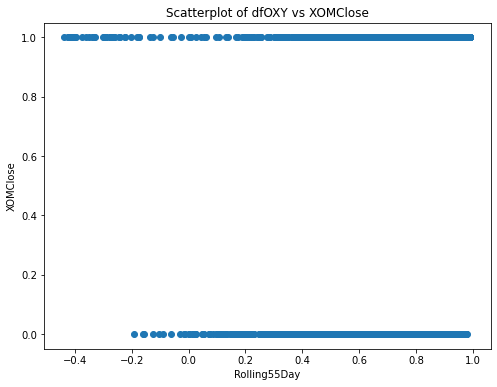

Correlation between XOM and dfHAL: -0.10383922830698288
P-value: 8.072588201440854e-06
Shape: (1840, 3)


<Figure size 432x288 with 0 Axes>

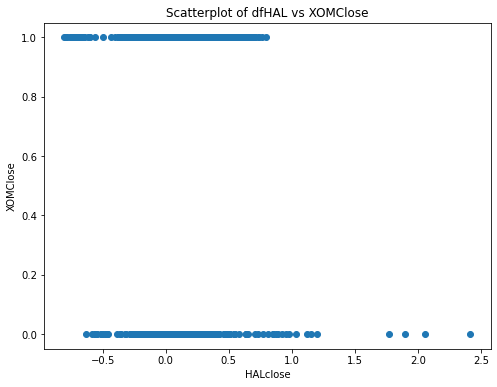

Pct Change Period is 55


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 55Day Rolling Corr of dfHAL: -0.017791893541655484

P-value: 3.60224920507493e-08
Shape: (1840, 3)


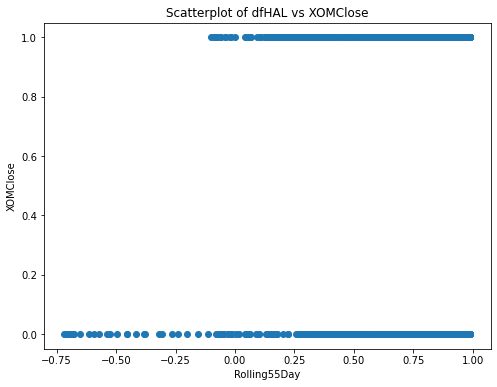

Correlation between XOM and dfTLT: -0.05561344779662475
P-value: 0.017043105959015856
Shape: (1840, 3)


<Figure size 432x288 with 0 Axes>

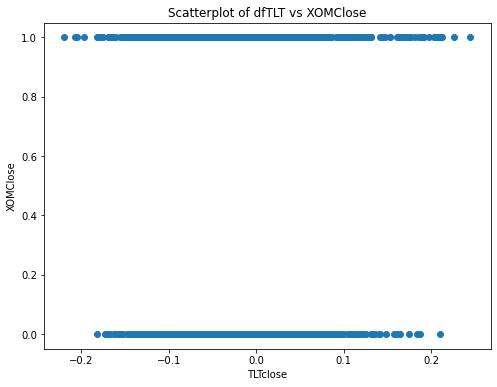

Pct Change Period is 55


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 55Day Rolling Corr of dfTLT: -0.00258666133738399

P-value: 1.878415531479453e-18
Shape: (1840, 3)


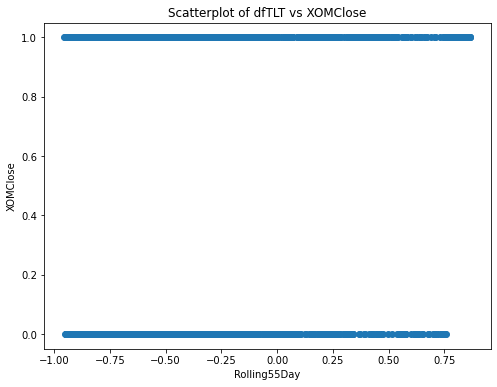

Correlation between XOM and dfUSO: -0.14905726626446883
P-value: 1.315013821163796e-10
Shape: (1840, 3)


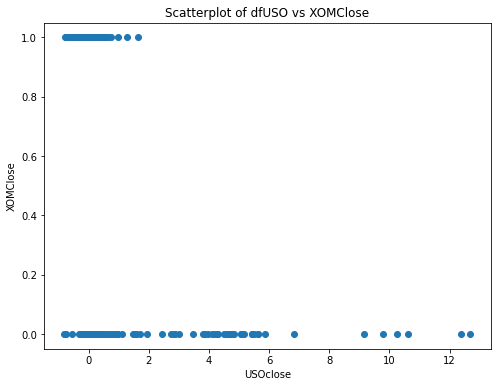

Pct Change Period is 55


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 55Day Rolling Corr of dfUSO: 0.13159725469726694

P-value: 0.001020374976626336
Shape: (1840, 3)


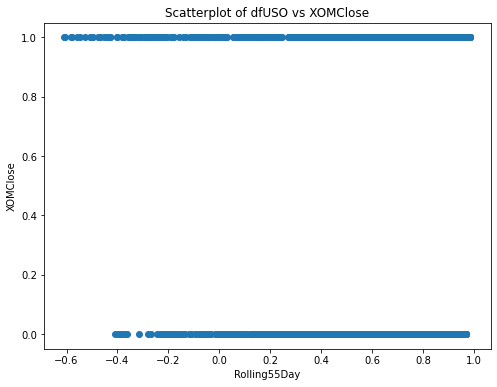

Correlation between XOM and dfSLB: -0.04903449325192602
P-value: 0.035953715377662496
Shape: (1830, 3)


<Figure size 432x288 with 0 Axes>

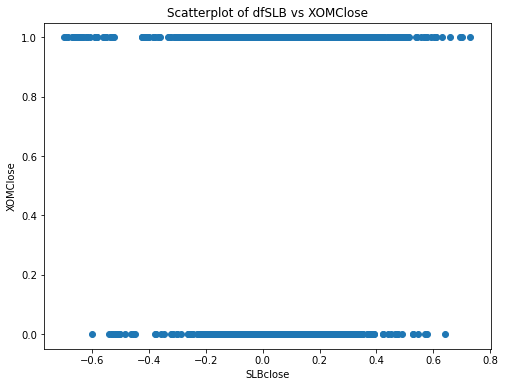

Pct Change Period is 60


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 60Day Rolling Corr of dfSLB: 0.05496226153273816

P-value: 0.10226697579413627
Shape: (1830, 3)


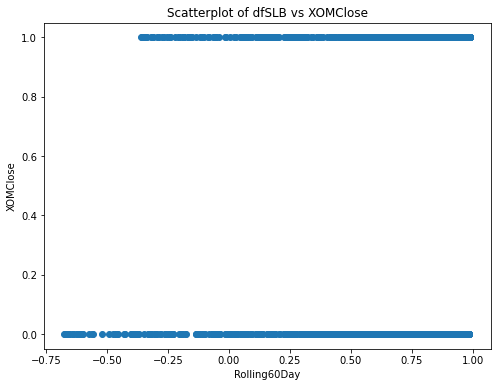

Correlation between XOM and dfPSX: -0.08705513831241614
P-value: 0.00019252814253761138
Shape: (1830, 3)


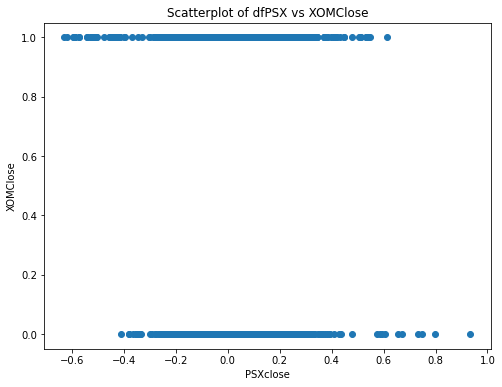

Pct Change Period is 60


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 60Day Rolling Corr of dfPSX: 0.10365791112038143

P-value: 0.023029640480977255
Shape: (1830, 3)


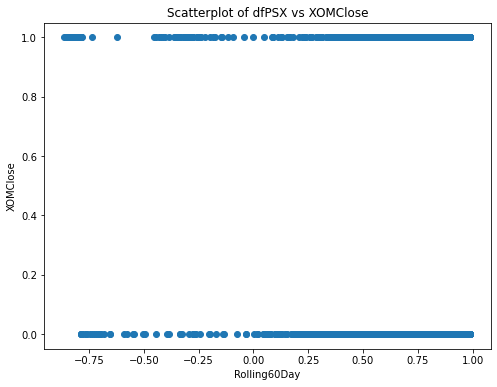

Correlation between XOM and dfMPC: -0.09490255399577209
P-value: 4.778695263633585e-05
Shape: (1830, 3)


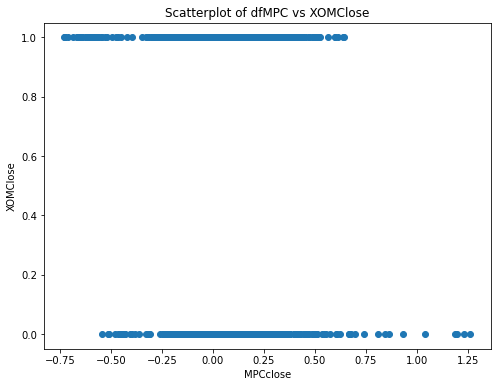

Pct Change Period is 60


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 60Day Rolling Corr of dfMPC: 0.07258985589667684

P-value: 0.02140300988729332
Shape: (1830, 3)


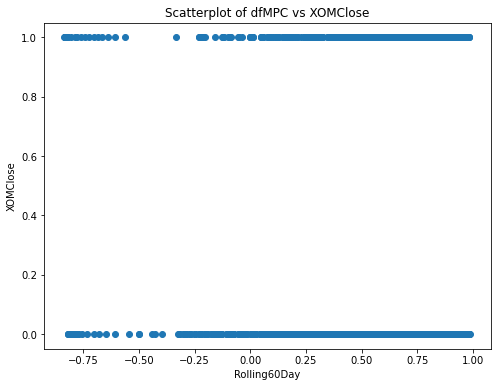

Correlation between XOM and dfVLO: -0.07327377111729497
P-value: 0.0017090912737346053
Shape: (1830, 3)


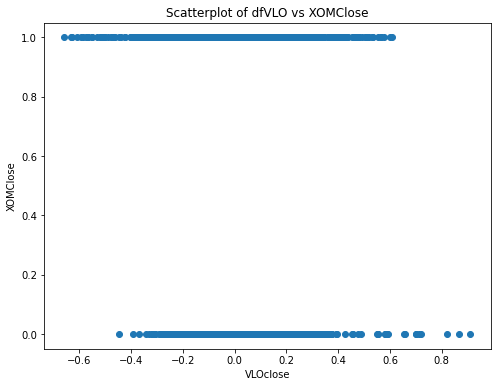

Pct Change Period is 60


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 60Day Rolling Corr of dfVLO: 0.07763253023087661

P-value: 0.12965464486043457
Shape: (1830, 3)


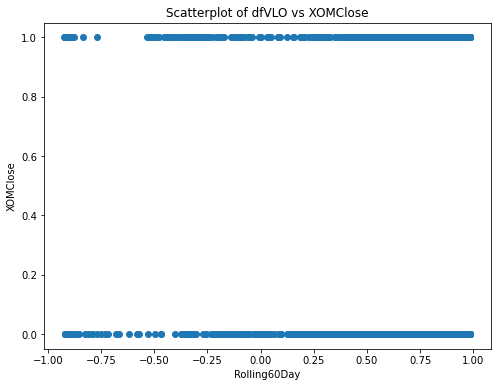

Correlation between XOM and dfHES: -0.11668229151269145
P-value: 5.580759714977326e-07
Shape: (1830, 3)


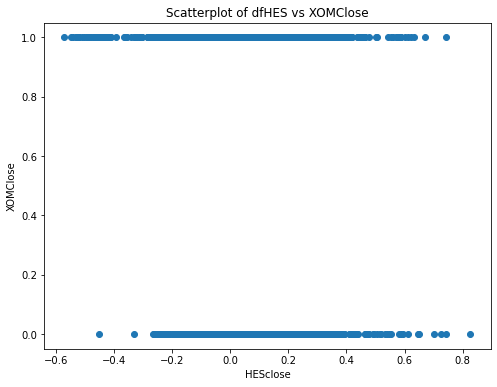

Pct Change Period is 60


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 60Day Rolling Corr of dfHES: 0.028888297561998212

P-value: 0.22004884435664712
Shape: (1830, 3)


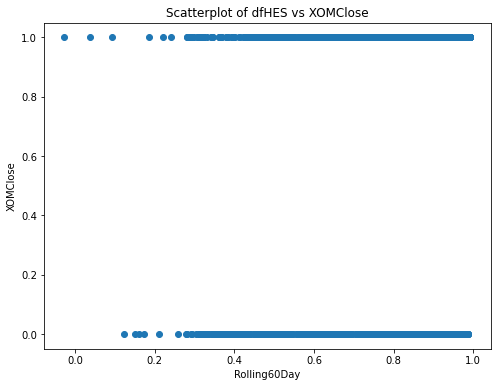

Correlation between XOM and dfOXY: 0.14086326098819985
P-value: 1.4305830734523846e-09
Shape: (1830, 3)


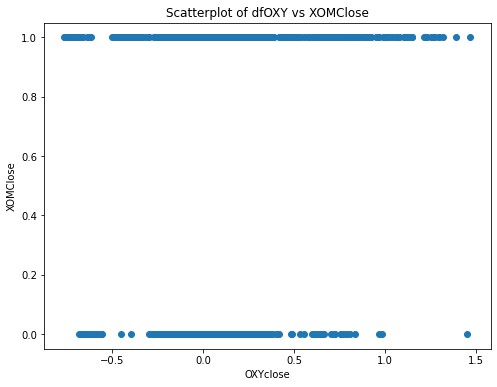

Pct Change Period is 60


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 60Day Rolling Corr of dfOXY: 0.10200253781083746

P-value: 1.432077188746105e-07
Shape: (1830, 3)


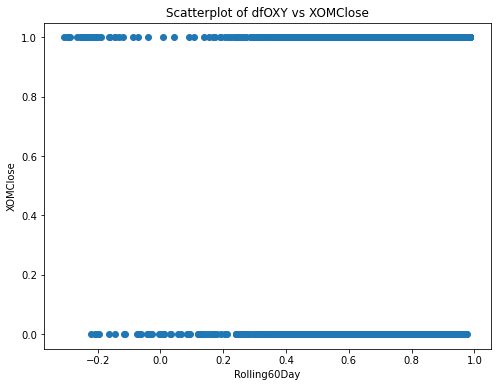

Correlation between XOM and dfHAL: -0.09348753804286761
P-value: 6.193926754414471e-05
Shape: (1830, 3)


<Figure size 432x288 with 0 Axes>

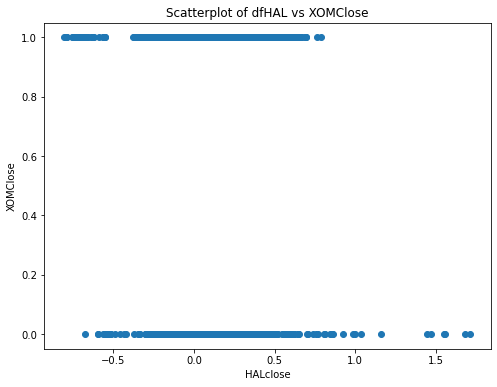

Pct Change Period is 60


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 60Day Rolling Corr of dfHAL: -0.05006217952270763

P-value: 7.098471135313662e-05
Shape: (1830, 3)


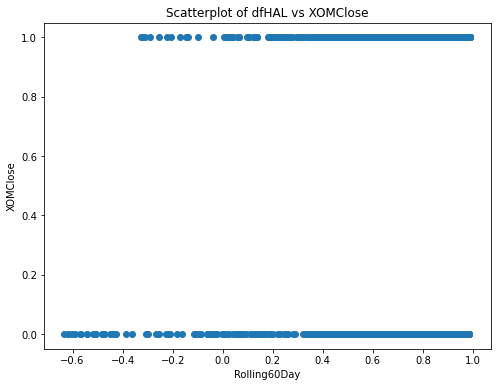

Correlation between XOM and dfTLT: -0.081048988046548
P-value: 0.0005194987699296077
Shape: (1830, 3)


<Figure size 432x288 with 0 Axes>

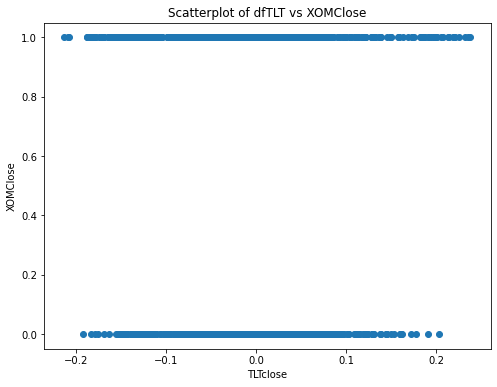

Pct Change Period is 60


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 60Day Rolling Corr of dfTLT: 0.010037607789087041

P-value: 9.36051296905694e-22
Shape: (1830, 3)


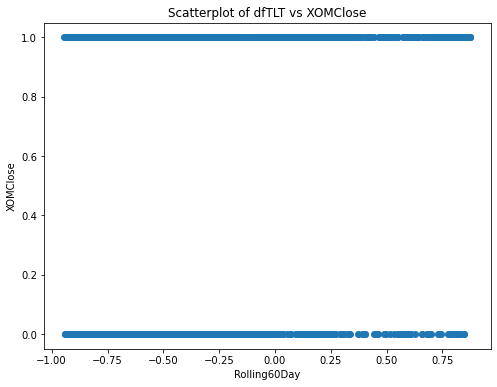

Correlation between XOM and dfUSO: -0.15558829837166605
P-value: 2.2002396577770234e-11
Shape: (1830, 3)


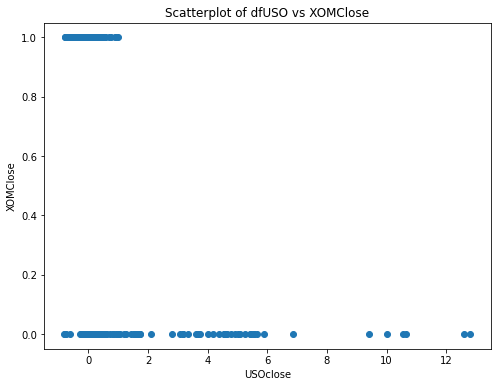

Pct Change Period is 60


<Figure size 432x288 with 0 Axes>

Correlation between XOM and 60Day Rolling Corr of dfUSO: 0.12576618674379916

P-value: 0.0006655614223361174
Shape: (1830, 3)


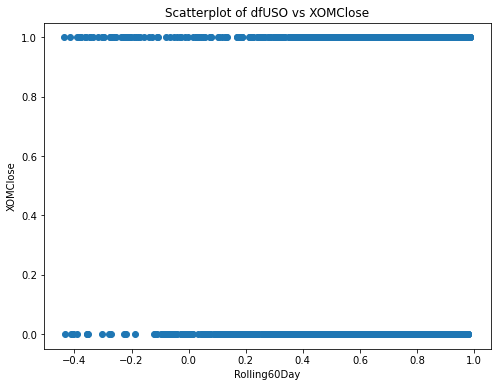

In [8]:
from scipy.stats import pointbiserialr

# Create scatterplots and correlation matrices

for i in range(30, 61, 5):
    for key1, df1 in dctStockDfs.items():
        # Reset the index if necessary
        df1 = df1.reset_index(drop=True)
        dfYvar_aligned = dfYvar.reset_index(drop=True)

        # Concatenate the dataframes
        dfCorr = pd.concat([df1, dfYvar_aligned], join='inner', axis=1)

        # Handle NaN and Inf values before calculations
        #dfCorr.replace([np.nan, np.inf, -np.inf], 0, inplace=True)
        
        dfCorr=dfCorr.dropna() #Calculate percentage change
        
        dfCorr = dfCorr.pct_change(i)
        dfCorr[f'Rolling{str(i)}Day']=dfCorr.iloc[:, 1].rolling(i).corr(dfCorr.iloc[:, 0])
        rollingCorr=dfCorr.iloc[:, 1].corr(dfCorr.iloc[:, 2])
        dfCorr.iloc[:, 1] = dfCorr.iloc[:, 1].shift(-i)
        
        dfCorr.iloc[:, 1] = (dfCorr.iloc[:, 1] > 0).astype(int)
        
 
        dfCorr = dfCorr.dropna()

        # Handle NaN and Inf values after calculations
        #dfCorr.replace([np.nan, np.inf, -np.inf], 0, inplace=True)

        # Calculate and display correlation
        if not dfCorr.empty:
            correlation_coefficient, p_value = pointbiserialr(dfCorr.iloc[:, 0], dfCorr.iloc[:, 1])
            correlation_coefficient2, p_value2 = pointbiserialr(dfCorr.iloc[:, 0], dfCorr.iloc[:, 2])

            if p_value<0.05:
            # Print percentage change, correlation coefficient, and p-value
                #print(f'Percentage Change for {key1} at {i} days: {dfCorr.iloc[-1, 0]}')
                print(f'Correlation between XOM and {key1}: {correlation_coefficient}')
                print(f'P-value: {p_value}')
                print(f'Shape: {dfCorr.shape}')
    
                # Create scatterplot
                plt.figure(figsize=(8, 6))
                plt.scatter(dfCorr.iloc[:, 0], dfCorr.iloc[:, 1])
                plt.title(f'Scatterplot of {key1} vs XOMClose')
                plt.xlabel(dfCorr.columns[0])
                plt.ylabel('XOMClose')
                plt.show()
                
                plt.close()
                plt.clf()
                
                print(f'Pct Change Period is {i}')
                plt.show()
                print(f'Correlation between XOM and {str(i)}Day Rolling Corr of {key1}: {rollingCorr}\n')
                print(f'P-value: {p_value2}')
                print(f'Shape: {dfCorr.shape}')
                # Create scatterplot
                plt.figure(figsize=(8, 6))
                plt.scatter(dfCorr.iloc[:, 2], dfCorr.iloc[:, 1])
                plt.title(f'Scatterplot of {key1} vs XOMClose')
                plt.xlabel(dfCorr.columns[2])
                plt.ylabel('XOMClose')
                plt.show()
            else:
                plt.close()
                plt.clf()
            del(dfCorr)
